# Processing with pIMOS

This parses straight from raw files to Process Level 1 - i.e. skips process level 0.

Included instruments:
- SBE56
- SBE39 T
- SBE39 TP
- SBE37 CTD 
- Our very special friend, SBE37 4567 CT
- Wetlabs
- Signature
- Vector
- TRDI ADCPS


In [7]:
import zutils.file as zfile

import pIMOS.xrwrap.seabird_37_39_56 as seabird_37_39_56
import pIMOS.xrwrap.wetlabs_ntu as wetlabs_ntu
import pIMOS.xrwrap.nortek_signature as nortek_signature
import pIMOS.xrwrap.nortek_vector as nortek_vector #, num2date_lk

import pIMOS.utils.UWA_archive_utils as ai 

import os
import matplotlib.pyplot as plt
import datetime
import numpy as np 
import pandas as pd
import xarray as xr
import glob

import pIMOS.utils.quality_control as pqc
import importlib

# O Drive is //drive.irds.uwa.edu.au/CEME-BBL-001
# pIMOS_export_dir = r'O:\Data\pIMOS\KISSME'

project_root = r'G:\Experiments\rs19'
project_root = r'E:\Experiments\rs19'

archive_dir = os.path.join(project_root, 'archive_FV01') 
moored_data_root = os.path.join(project_root, 'data/moored_instrument_data') 

dbconfig_file = os.path.join('./', 'database', 'config.txt') 

if not os.path.exists(archive_dir):
    os.mkdir(archive_dir)


# Loop through all now using the spreadsheet

# Now the Wetlabs

In [1]:
filetypes = ['FLNTUSB', 'NTU'];

db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
moorings = db_data['possible_mooring_dates']['Mooring'].values

# dfd = r'G:\Experiments\kissme17\Data\FLNTU\Device Files'
# dfd = r'E:\Experiments\rs19\FLNTU_DEVICE_FILES'

for index, row in db_data['autonomous_metadata'].iterrows():

    mooring = row['StationID'].strip().lower()
    instrument = row['InstrumentType'].strip()
    sn = row['SerialNo'].strip()
    attributes = ai.row_to_attrs(row)
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in filetypes:

        if not type(row['FileName'])==str:
            print('File column empty, skipping.')
            continue  
        
        filename = os.path.join(moored_data_root, row['FilePath'], row['FileName'])
        folder_df = os.path.join(project_root, 'FLNTU_DEVICE_FILES', str(sn))
        
        dfn = glob.glob(folder_df+'/*.dev')
        
        if len(dfn)==0:
            print('No device file for {}, skipping'.format(str(sn)))
            continue
        elif not len(dfn)==1:
            print('whoa: {}'.format(str(sn)))
            dfn = [i for i in dfn if '(NTU)' in os.path.split(i)[1]]
        else:
            pass

        dfn = dfn[0]
        print(filename)
        print(dfn)
        
        rr, ds = wetlabs_ntu.from_log(filename)
        rr._calibrate_device(dfn)
        
        rr.update_attributes_with_dict(attributes)

        pqc.pimosInOutWaterQC(rr, mooring, db_data, experiment='rs2019', recovered='rs19_rec')
                
        ai.pIMOS_export(rr, archive_dir, instrument, sn)
        fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='turbidity', plotraw=True)
        
        png_path = rr.fullpath_last_export[0:-3] +'.png'
        fig.savefig(png_path, dpi=300)
        

NameError: name 'ai' is not defined

### Start with the SEABIRD data files that load from ascs

In [13]:
# import xarray as xr 

# ds = xr.open_dataset(r'E:\Experiments\rs19\archive_FV00\SBE56\[RS2019]_[RS19_REC]_[T150]_[290]_[SBE56 T ]_[7372]_[].nc')
# ds = xr.open_dataset(r'E:\Experiments\rs19\archive_FV00\SBE56\[RS2019]_[RS19_REC]_[T200]_[1500]_[SBE56 T ]_[7400]_[].nc')
# ds = xr.open_dataset(r'E:\Experiments\rs19\archive_FV00\SBE56\[RS2019]_[RS19_REC]_[T330]_[19000]_[SBE56 T ]_[781]_[].nc')

# %matplotlib
# ds.Temperature.plot()

Using matplotlib backend: Qt5Agg


In [16]:
# %matplotlib inline 

autonomous_metadata = ROWLEY_Instruments.csv

profiler_metadata = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv
autonomous_metadata = ROWLEY_Instruments.csv

profiler_metadata = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv
E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_4455_20190424_cleaned.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[2000]_[SBE39 T]_[4455]_[no_outfile_append].nc


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 5864 values.


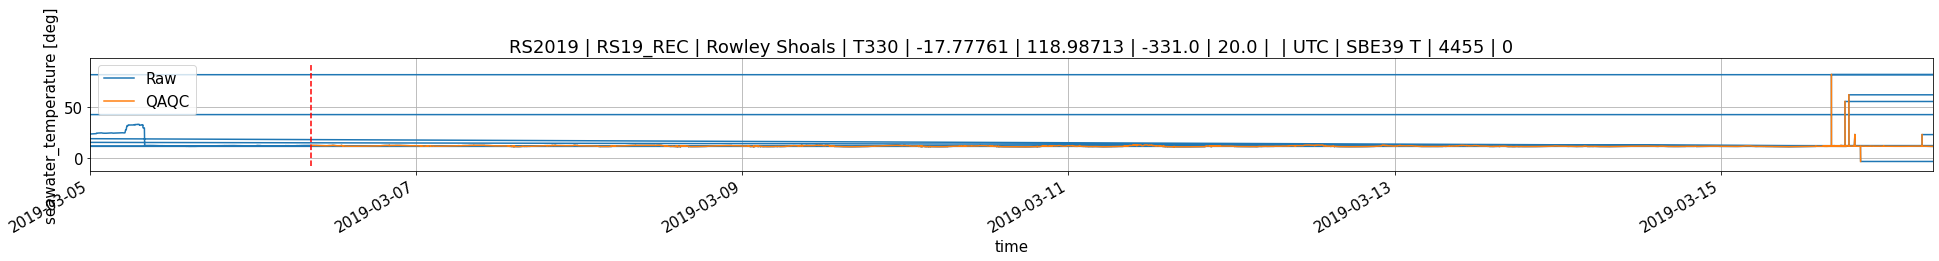

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3753_20190425.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[3000]_[SBE39 T]_[3753]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


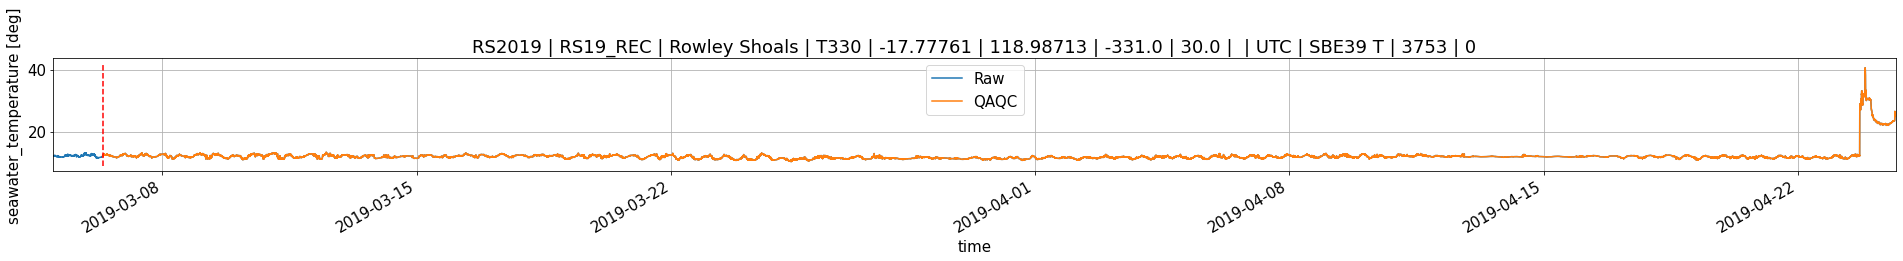

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3752_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[5000]_[SBE39 T]_[3752]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 3901 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


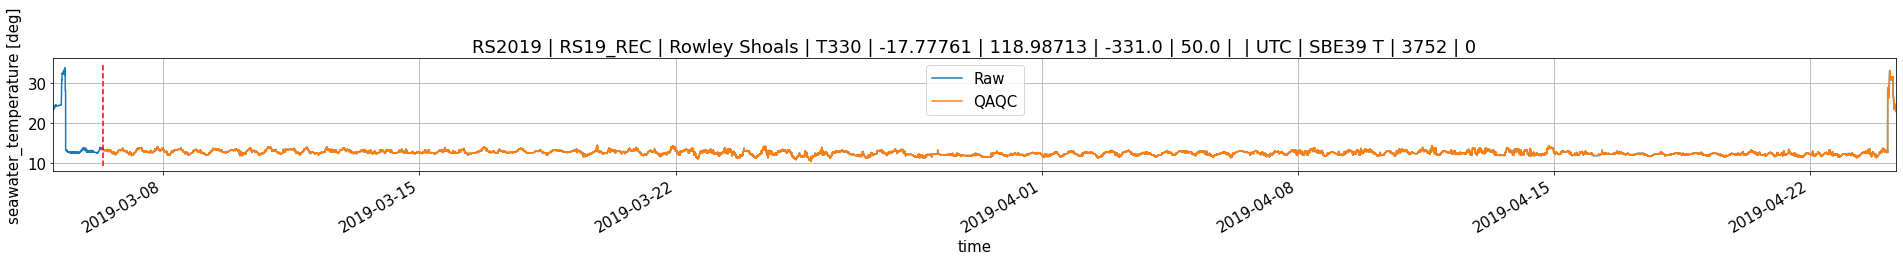

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3750_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[6000]_[SBE39 T]_[3750]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


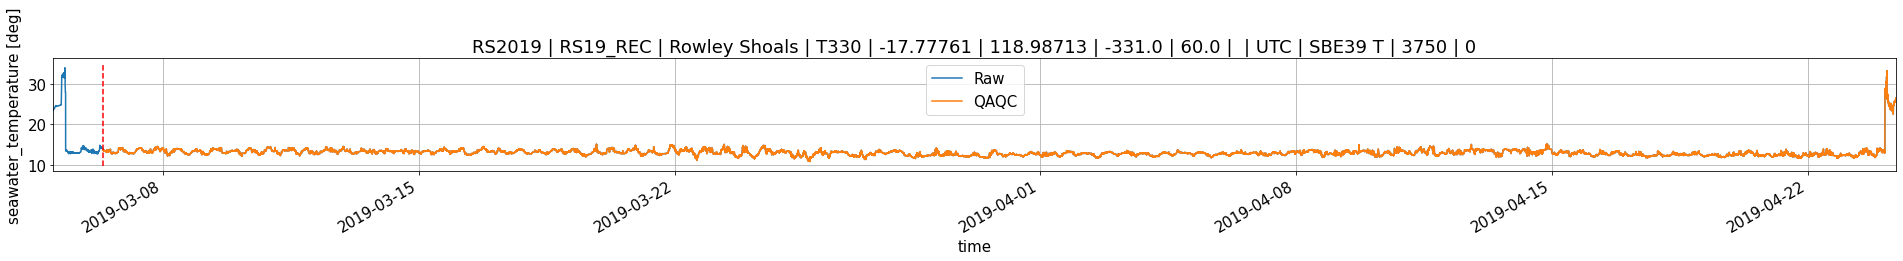

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3749_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[7000]_[SBE39 T]_[3749]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


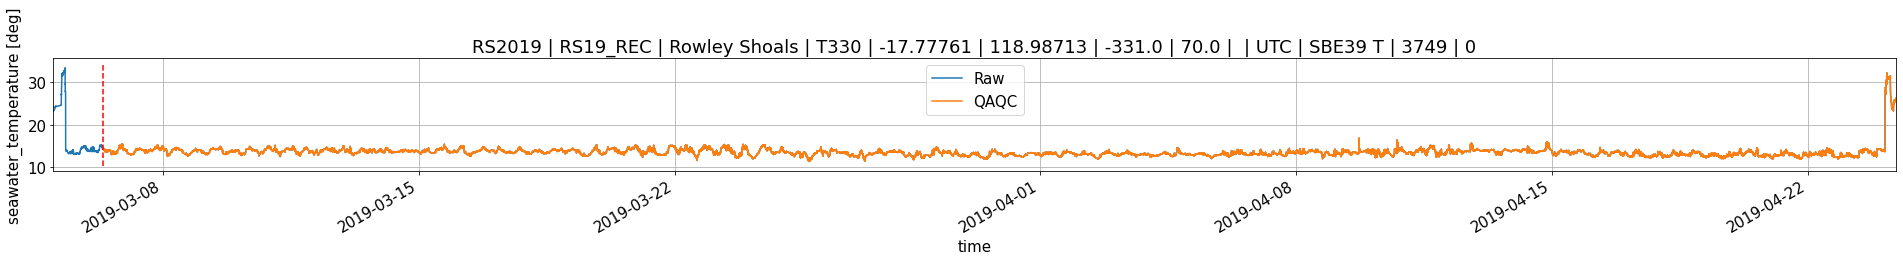

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3747_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[8000]_[SBE39 T]_[3747]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


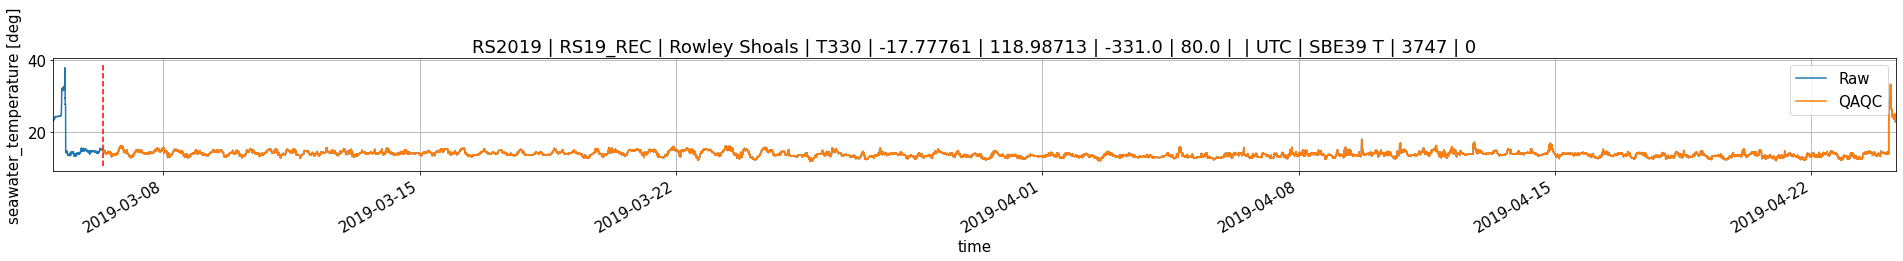

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3731_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[9000]_[SBE39 T]_[3731]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


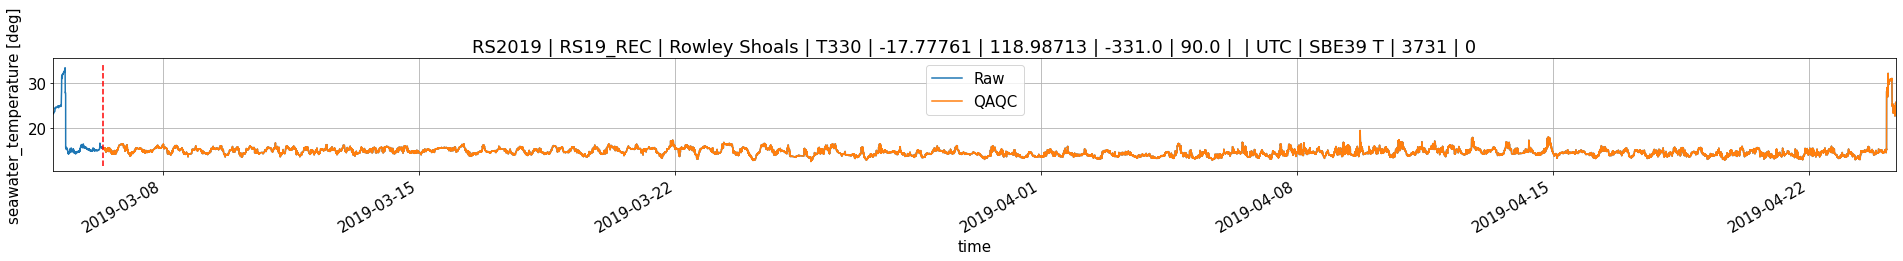

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3730_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[10000]_[SBE39 T]_[3730]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


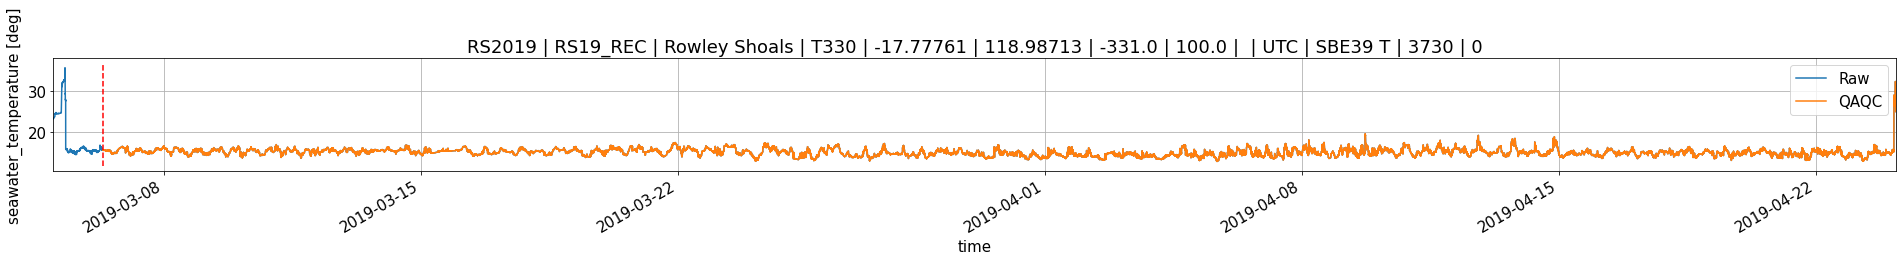

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3729_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[11000]_[SBE39 T]_[3729]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


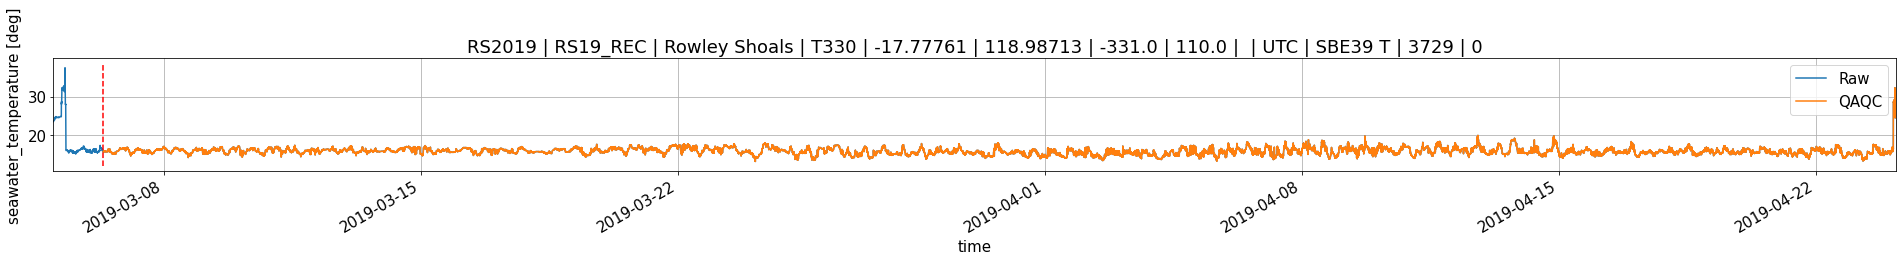

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_4456_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[12000]_[SBE39 T]_[4456]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


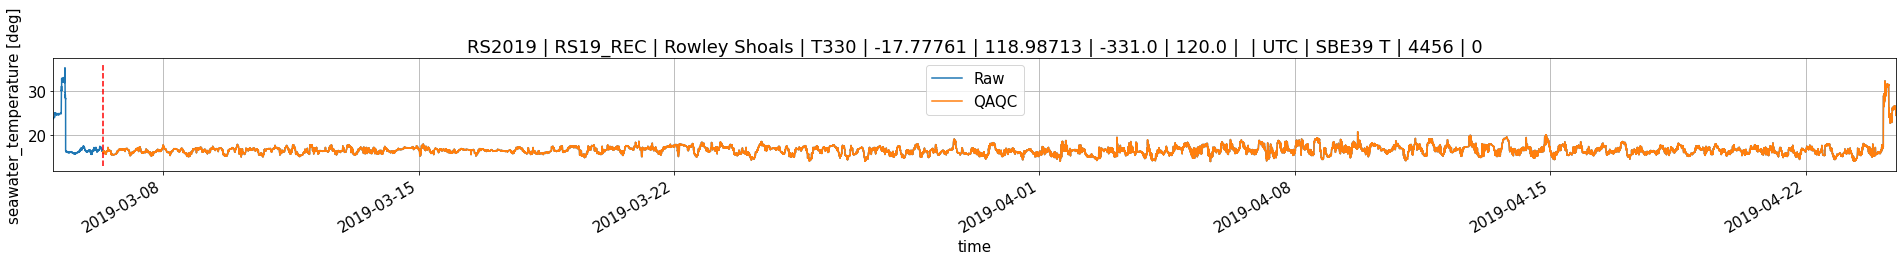

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3723_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[13000]_[SBE39 T]_[3723]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


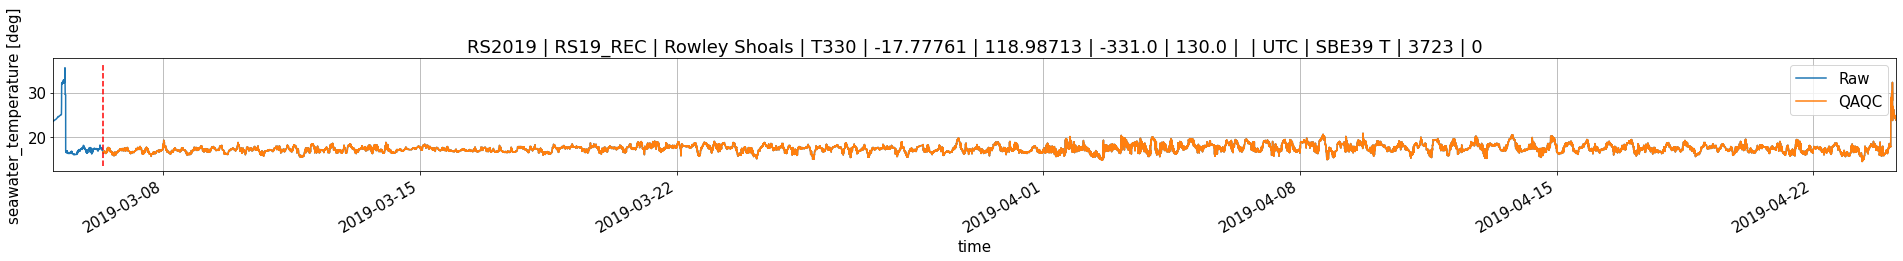

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_6527_20190424.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[14000]_[SBE39 TP]_[6527]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Blanking 3901 values.


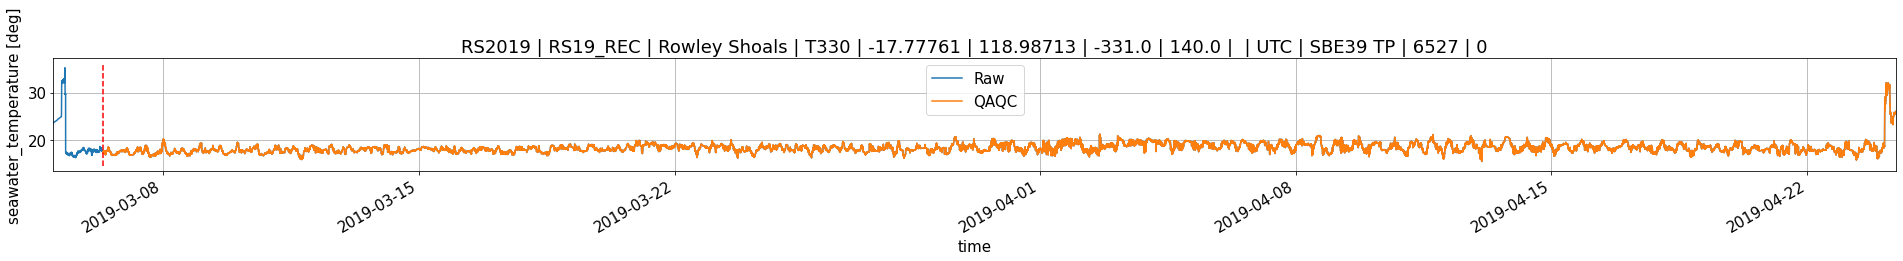

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3728_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[15000]_[SBE39 T]_[3728]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


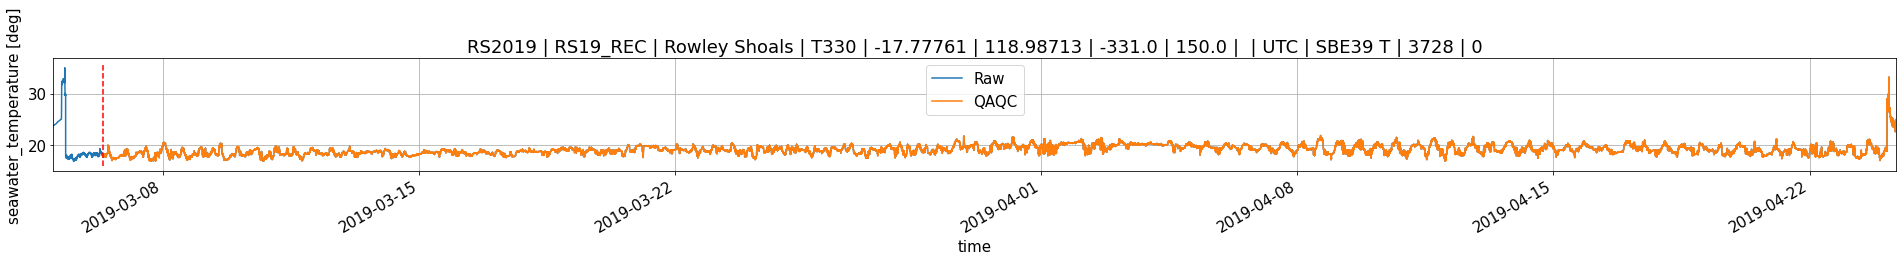

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3727_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[16000]_[SBE39 T]_[3727]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


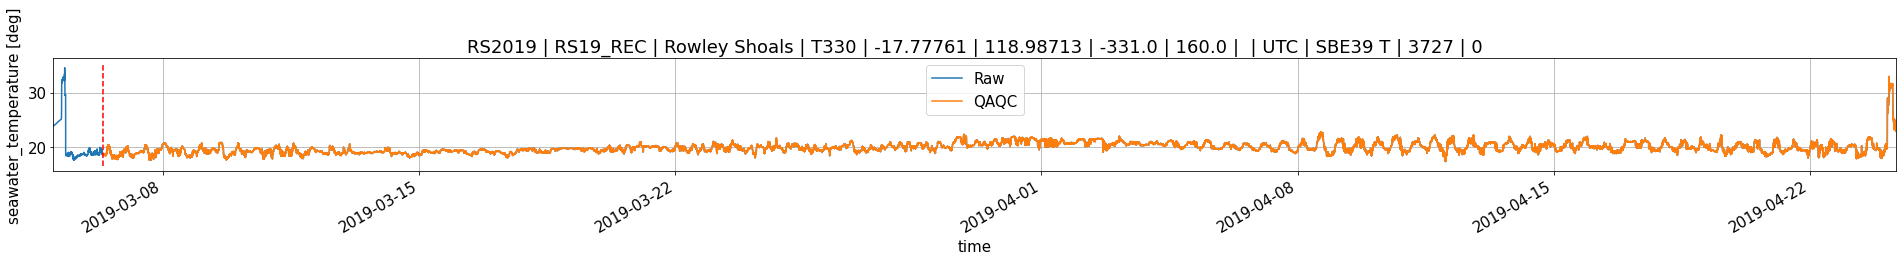

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3726_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[17000]_[SBE39 T]_[3726]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


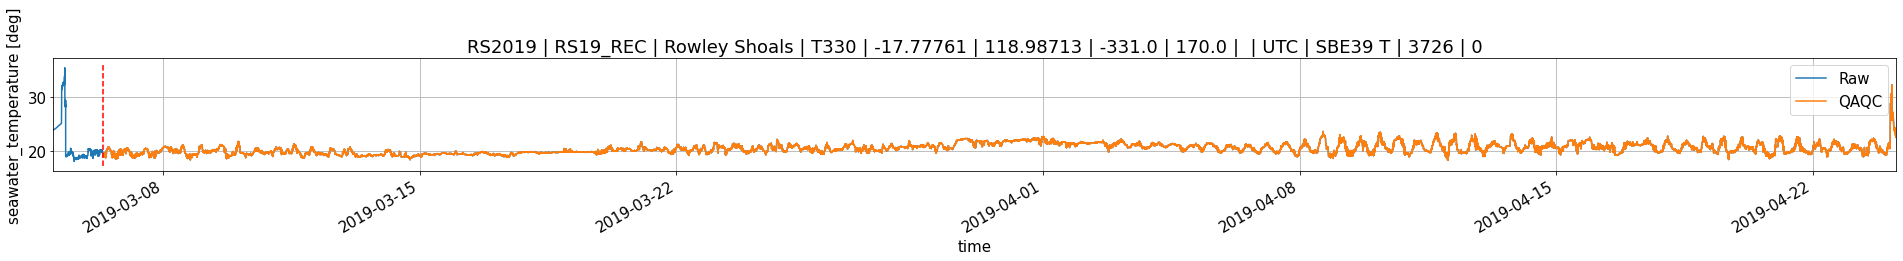

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3725_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[18000]_[SBE39 T]_[3725]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


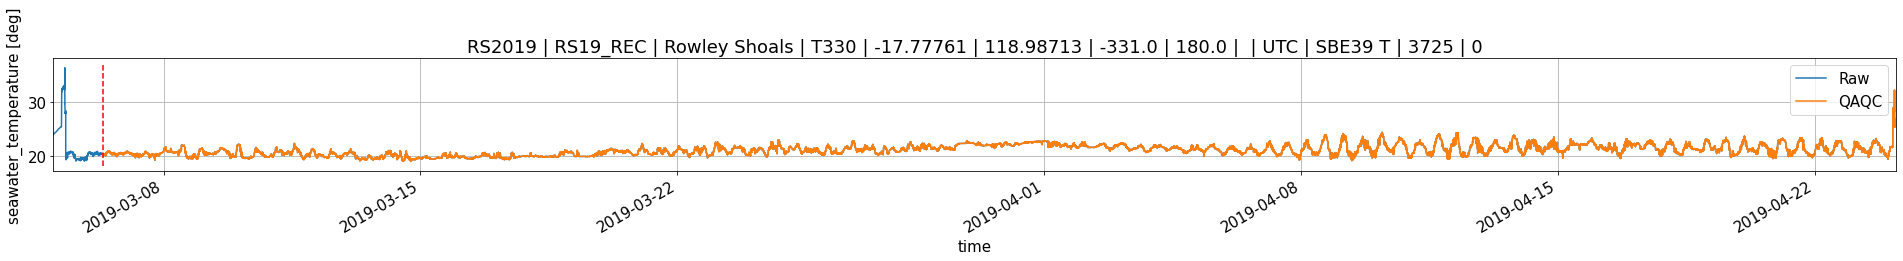

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_6528_20190424.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[23000]_[SBE39 TP]_[6528]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 3901 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


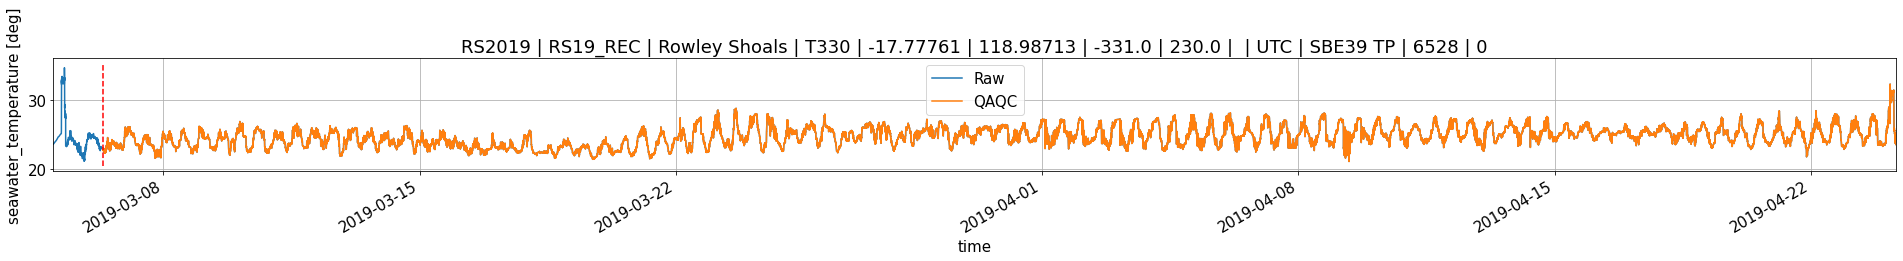

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3724_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[27020]_[SBE39 T]_[3724]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


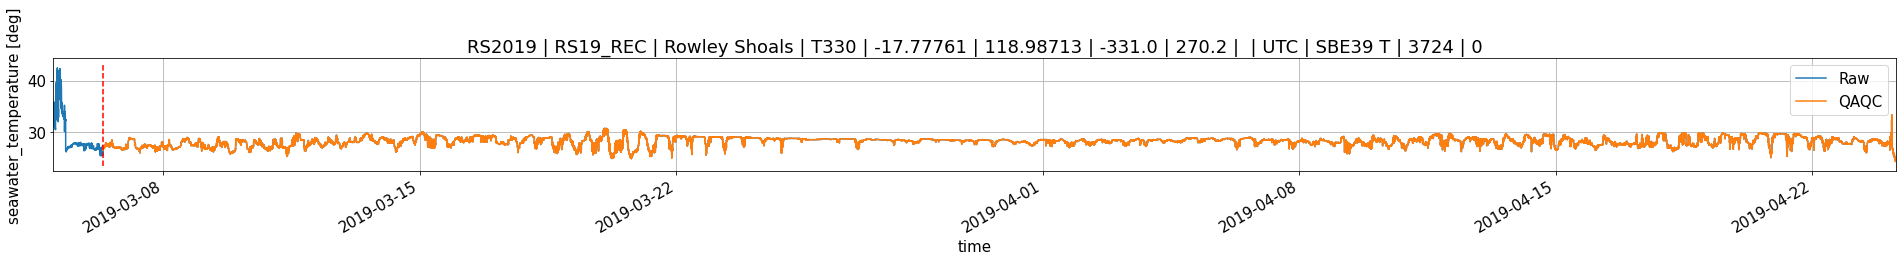

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3722_20190425.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[28000]_[SBE39 T]_[3722]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 6595 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


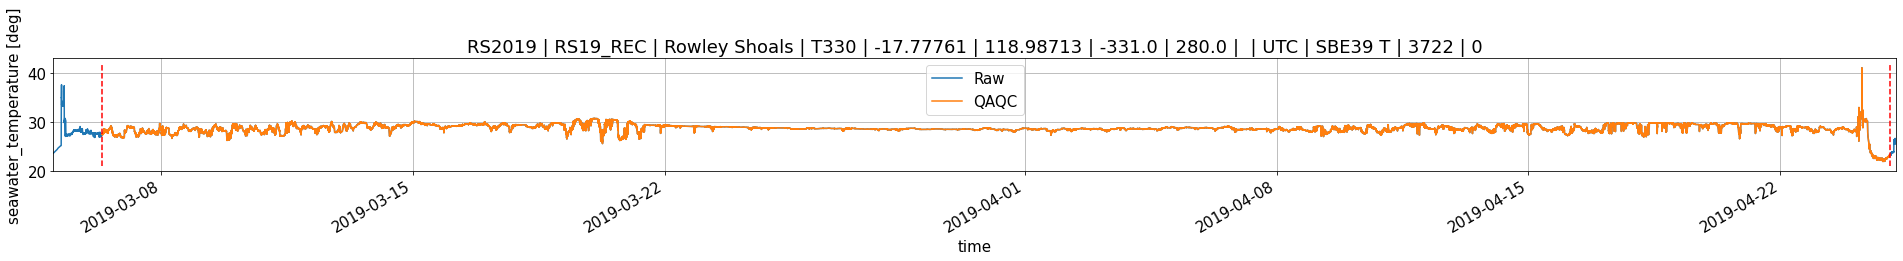

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3721_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[29000]_[SBE39 T]_[3721]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


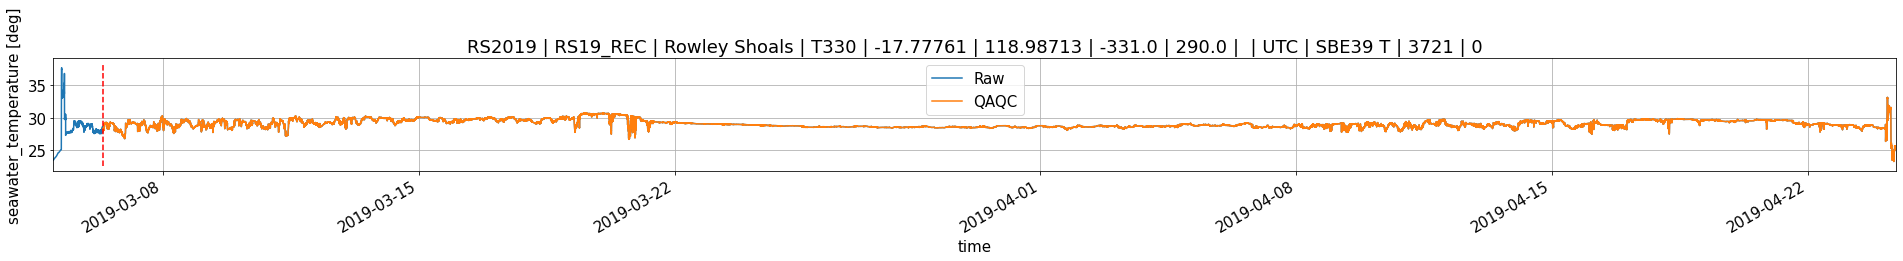

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_3719_20190424.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[30000]_[SBE39 T]_[3719]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5851 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


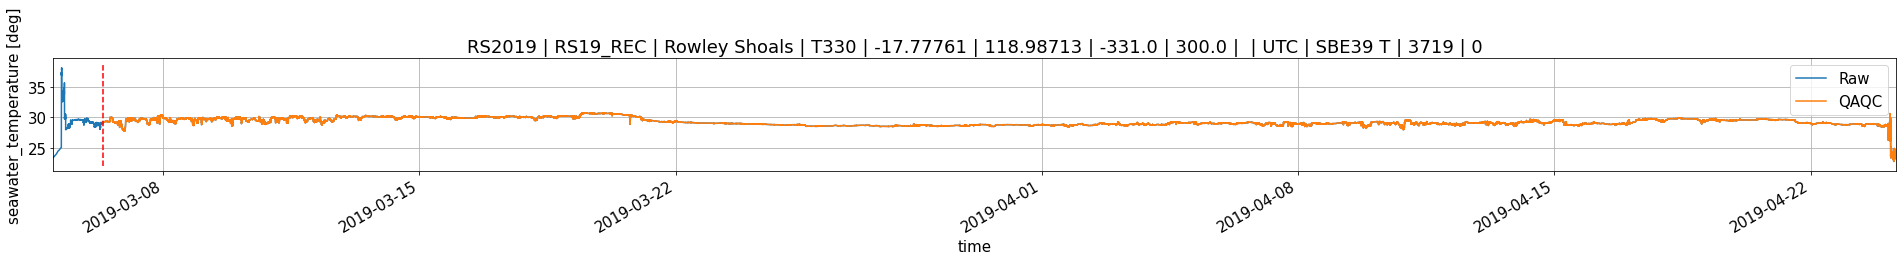

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\SBE39\39_6523_20190425.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T330]_[30839]_[SBE39 TP]_[6523]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 4425 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


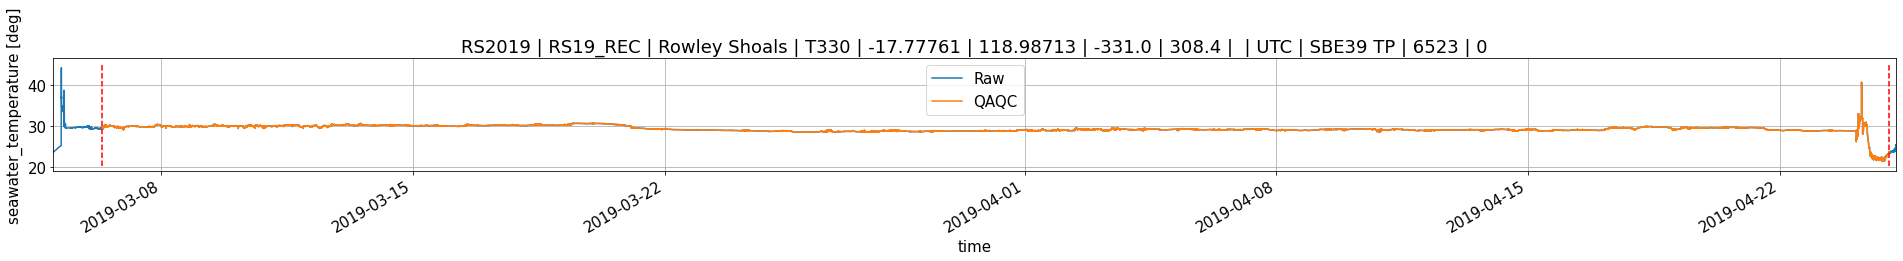

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_4454_20190425.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[9000]_[SBE39 T]_[4454]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5131 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


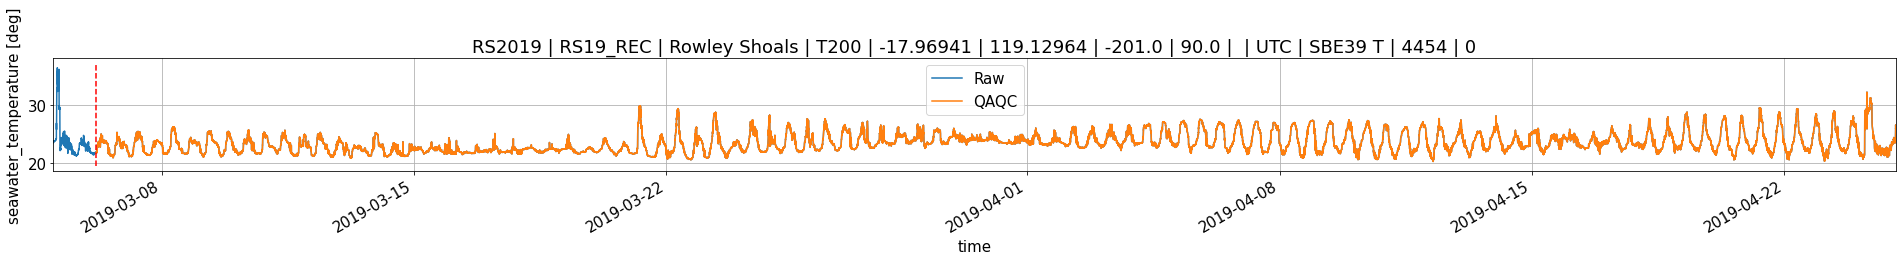

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_6530_20190425.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[10000]_[SBE39 TP]_[6530]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 3421 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


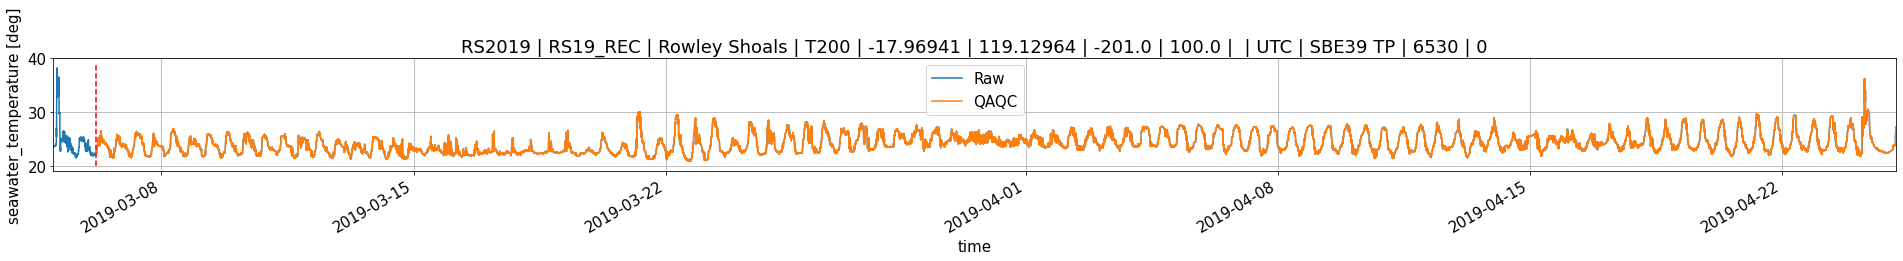

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_4453_20190425.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[11000]_[SBE39 T]_[4453]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5131 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


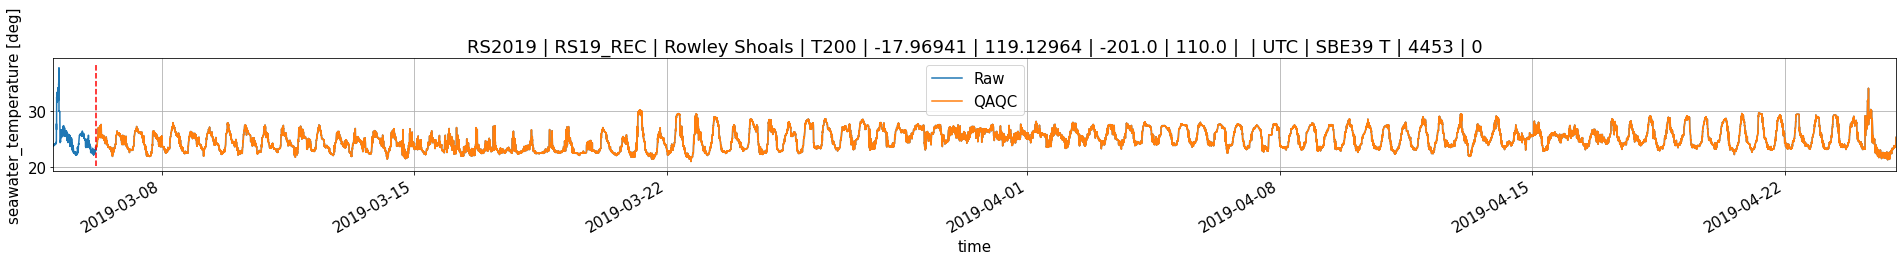

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_4452_20190425.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[12000]_[SBE39 T]_[4452]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5131 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


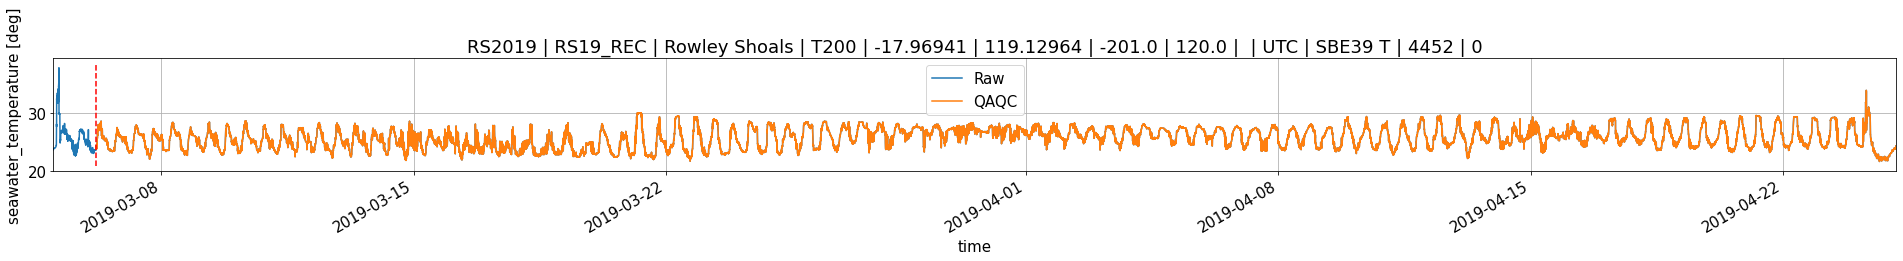

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_3975_20190425.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[13000]_[SBE39 T]_[3975]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5131 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


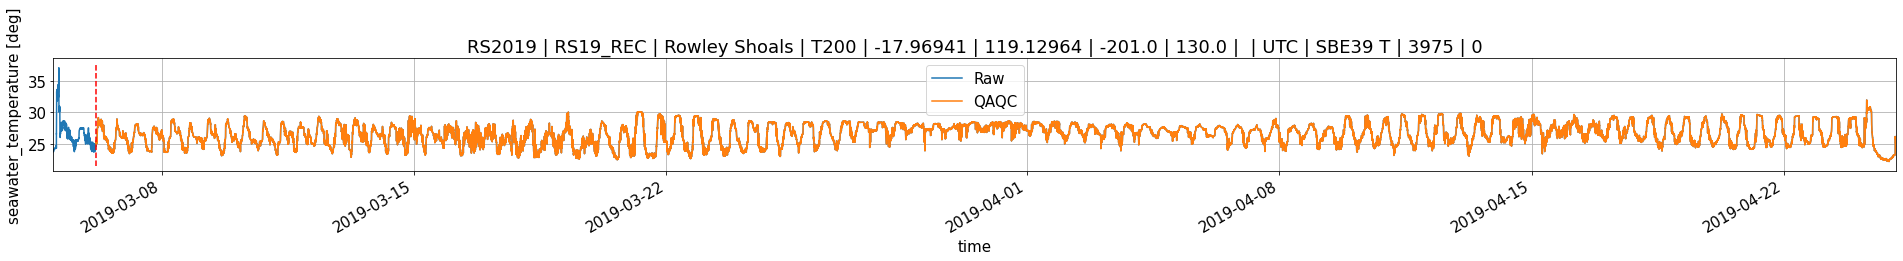

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_6529_20190425.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[14000]_[SBE39 TP]_[6529]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Blanking 3421 values.


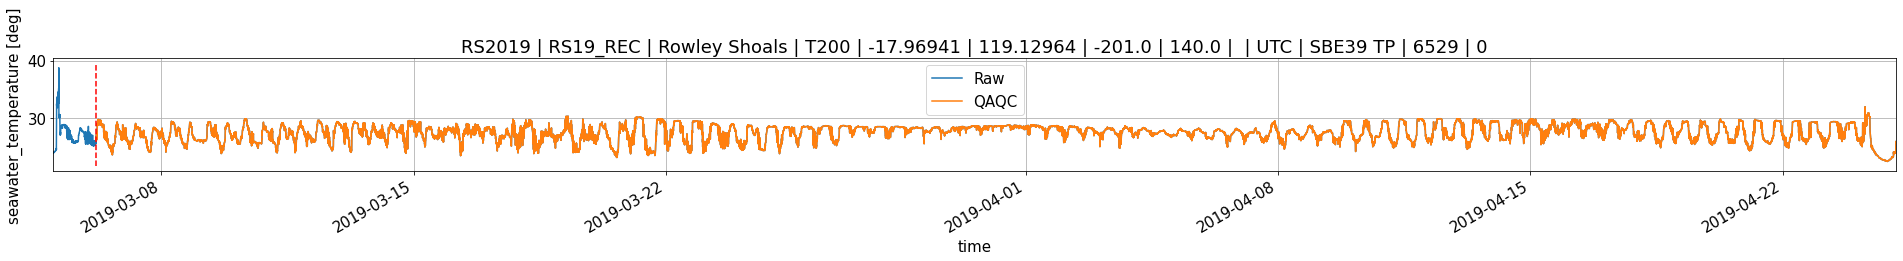

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_3799_20190425.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[15000]_[SBE39 T]_[3799]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5131 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


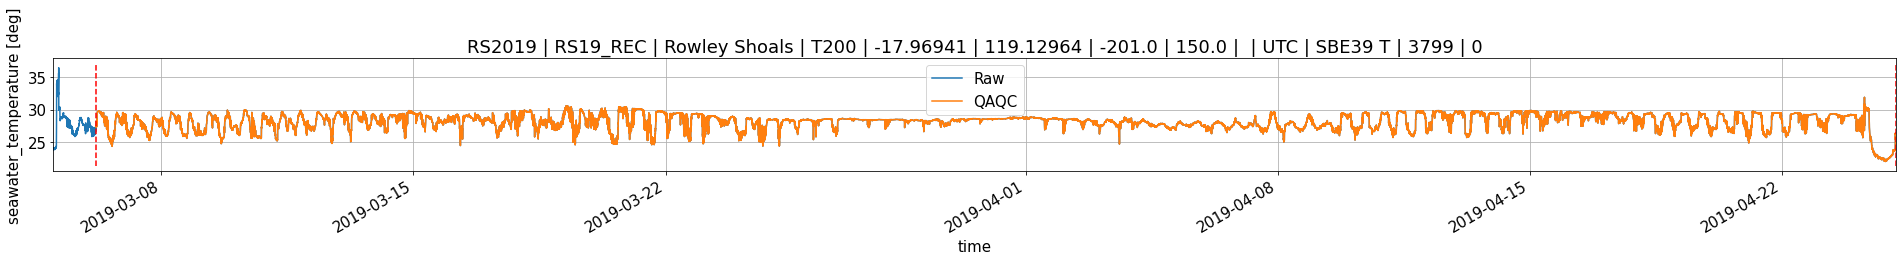

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_3798_20190425.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[16000]_[SBE39 T]_[3798]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5131 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


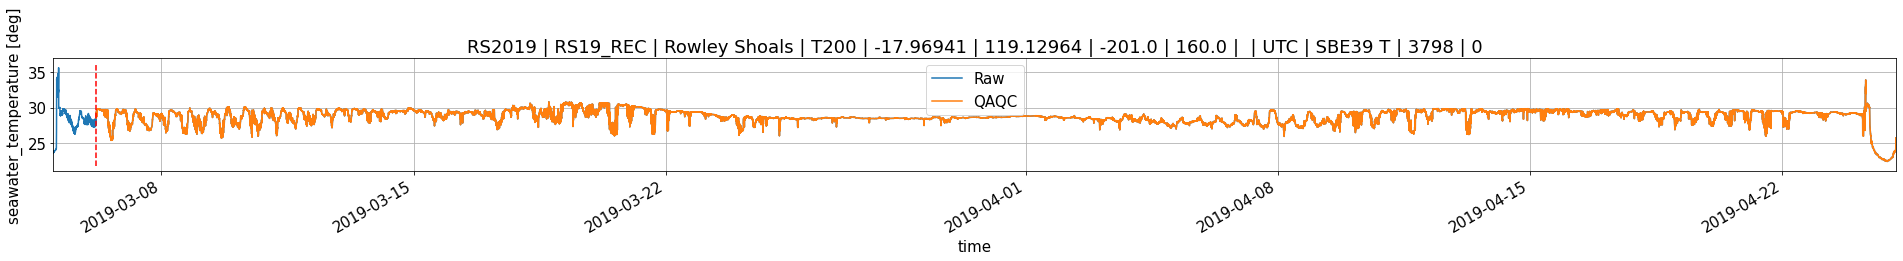

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_3754_20190425.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[17000]_[SBE39 T]_[3754]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 5158 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


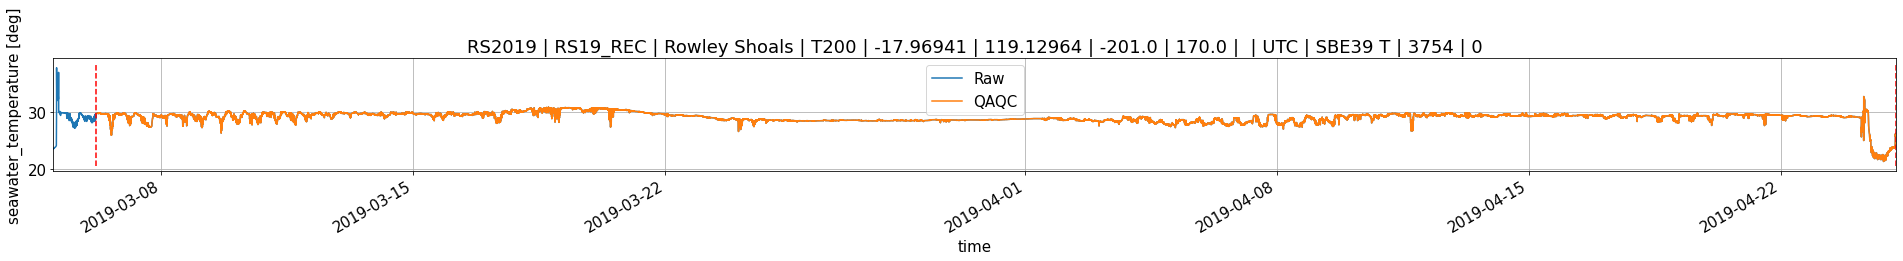

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\SBE39\39_6526_20190425.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T200]_[17900]_[SBE39 TP]_[6526]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 3486 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


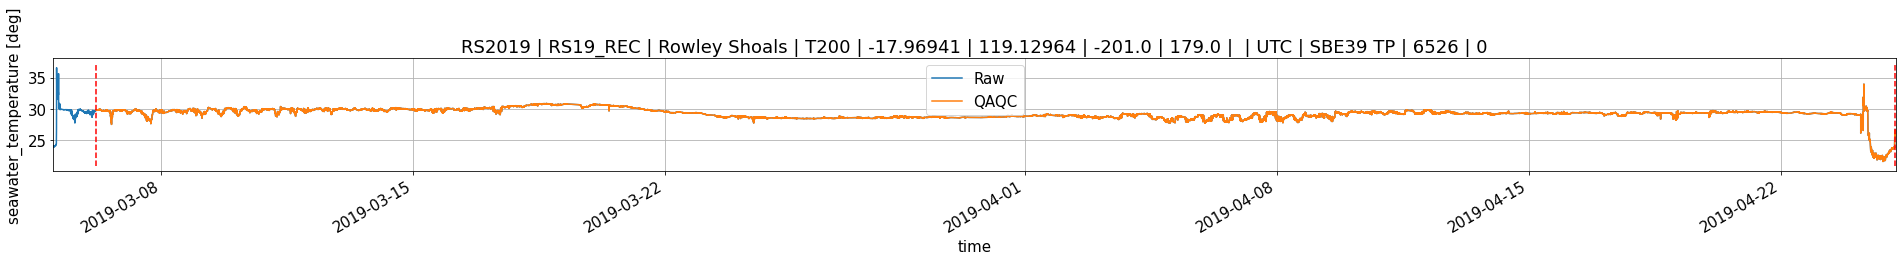

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T150\SBE39\SBE39plus08223_2019-04-23_cleaned.asc
File exists
asc file appears to be for an SBE37...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T150]_[3000]_[SBE39 TP]_[8223]_[no_outfile_append].nc


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 0 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


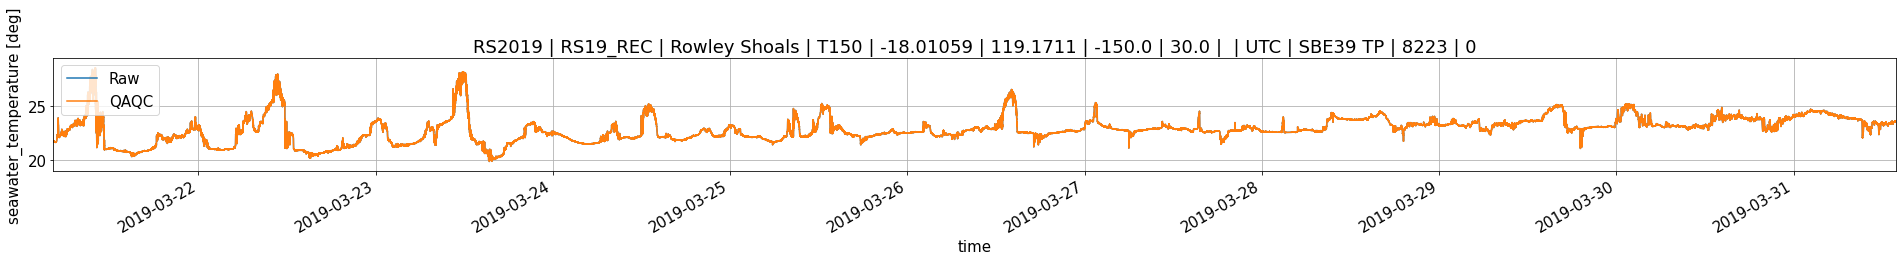

<ipython-input-3-e885042b004c>:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path, dpi=300)


E:\Experiments\rs19\data/moored_instrument_data\raw_data\T150\SBE39\39_5082_20190423.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T150]_[6500]_[SBE39 TP]_[5082]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 6281 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


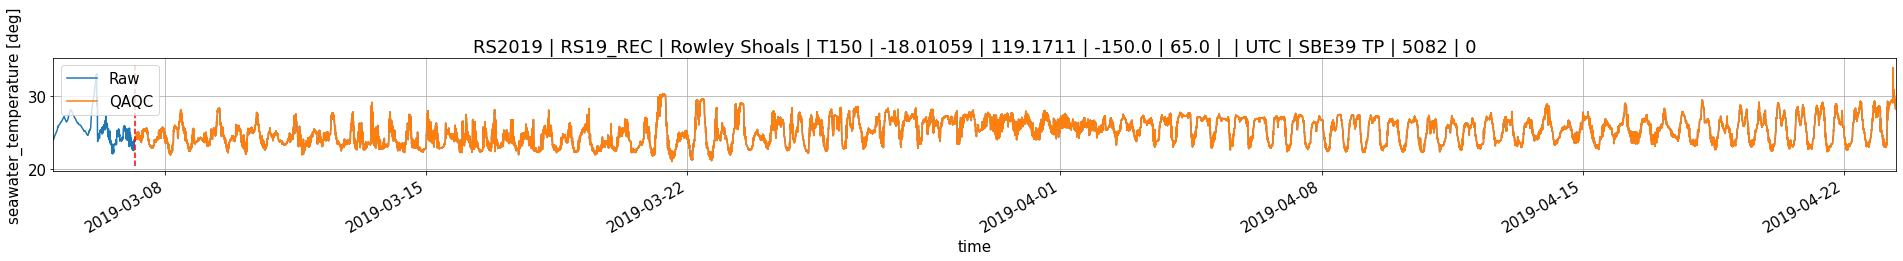

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T150\SBE39\SBE39plus06617_2019-04-25.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[T150]_[12850]_[SBE39 TP]_[6617]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 6281 values.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


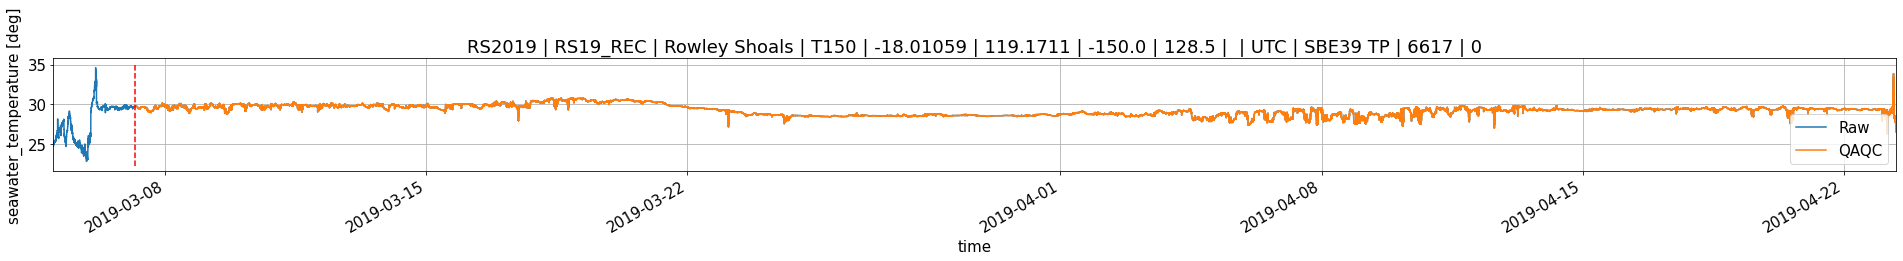

E:\Experiments\rs19\data/moored_instrument_data\raw_data\L150\SBE39\SBE39plus08222_2019-04-25.asc
File exists
asc file appears to be for an SBE37...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\SBE39
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE39//[RS2019]_[RS19_REC]_[L150]_[1000]_[SBE39 TP]_[8222]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 953003 values.


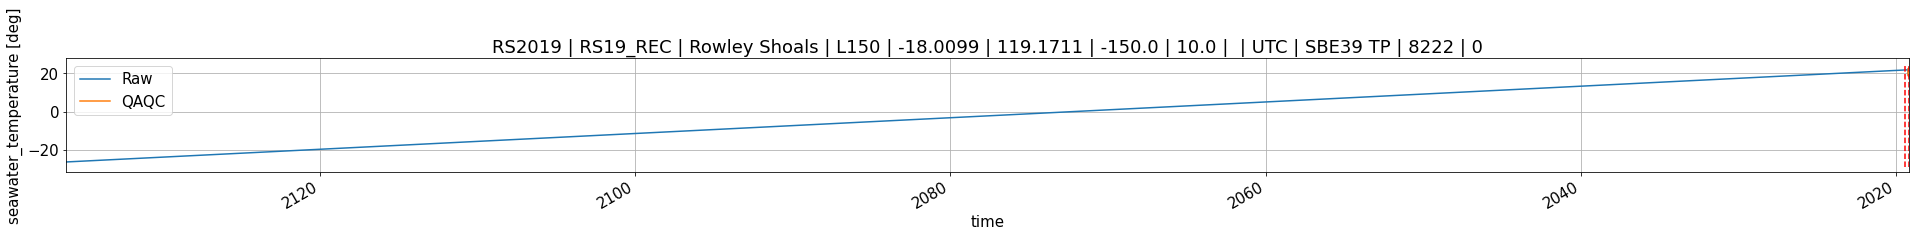

In [3]:
# csvfile = os.path.join(db_config['db_root'], db_config['db_csv'])
# os.path.exists(csvfile)
importlib.reload(ai)

filetypes = ['SBE39 TP', 'SBE39 T', 'SBE39-ext T', 'SBE37 CT'];

db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
moorings = db_data['possible_mooring_dates']['Mooring'].values

df = db_data['autonomous_metadata']
# df = df.loc[df['SerialNo']==3799]

for index, row in df.iterrows():
#     line = line.split(',')

    mooring = row['StationID'].strip()
    instrument = row['InstrumentType'].strip()
    sn = row['SerialNo'].strip()

    attributes = ai.row_to_attrs(row)

    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue
        
    if not sn in ['8223']:
        continue
    
    if instrument in ['SBE39 TP', 'SBE39 T', 'SBE39-ext T']:
        
        if not type(row['FileName'])==str:
            print('File column empty, skipping.')
            continue  

        asc_filename = os.path.join(moored_data_root, row['FilePath'], row['FileName'])
        print(asc_filename)
                
        if os.path.exists(asc_filename):
            print('File exists')
        else:
            print('File does not exist')
            raise(Exception)
            continue
        
#             mcout_asc = read_sbd.parse_seabird_asc(asc_filename)

        folder, file = os.path.split(asc_filename)
        rr, ds = seabird_37_39_56.from_asc(asc_filename)

        rr.update_attributes_with_dict(attributes)

#         ai.qc_impossible_date(rr, mooring, db_data, year_1=1890)
        pqc.pimosInOutWaterQC(rr, mooring, db_data, year_1=1890, experiment='rs2019', recovered='rs19_rec')

        ai.pIMOS_export(rr, archive_dir, instrument[0:5], sn)
        fig = ai.plot_temp(rr, db_data, mooring, attributes)
        
        png_path = rr.fullpath_last_export[0:-3] +'.png'
        fig.savefig(png_path, dpi=300)
                        

### Now the SEABIRD data files that load from cnvs

LANDER SBE56s NEED CONVERTING. USE SNOWDEN/PCM. 


autonomous_metadata = ROWLEY_Instruments.csv

profiler_metadata = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv
autonomous_metadata = ROWLEY_Instruments.csv

profiler_metadata = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv
E:\Experiments\rs19\data/moored_instrument_data\raw_data\T150\SBE56\SBE05607371_2019-04-23.cnv
File exists
Reading CNV file:
	E:\Experiments\rs19\data/moored_instrument_data\raw_data\T150\SBE56\SBE05607371_2019-04-23.cnv...
No lat/lon stored.
Initialising accessor.
STORING RAW FILE ATTRIBUTES
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\SBE56//[RS2019]_[RS19_REC]_[T150]_[480]_[SBE56 T]_[7371]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 120141 values.


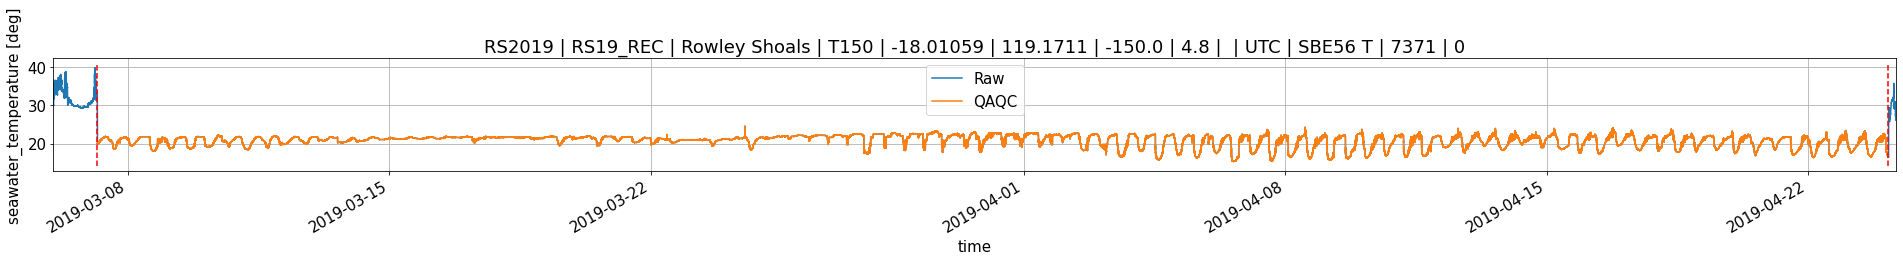

In [8]:
# raise(Exception('This must be converted to the Pandas Dataframe, not csvread.'))
# os.path.exists(csvfile)

filetypes = ['SBE56 T', 'SBE37 CTD'];

db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
moorings = db_data['possible_mooring_dates']['Mooring'].values

for index, row in db_data['autonomous_metadata'].iterrows():

    mooring = row['StationID'].strip()
    instrument = row['InstrumentType'].strip()
    sn = row['SerialNo'].strip()
    
    attributes = ai.row_to_attrs(row)
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue
        
#     if not mooring.lower() in ['t330']:
#         print('Skipping "{}"'.format(mooring))
#         continue
    
#     if not sn in ['7371']:
#     if not sn in ['12738', '781', '725', '711', '7374']:
#         continue

    if instrument in filetypes:

        if not type(row['FileName'])==str:
            print('File column empty, skipping.')
            continue 
                        
        cnv_filename = os.path.join(moored_data_root, row['FilePath'], row['FileName'])
        print(cnv_filename)

        if os.path.exists(cnv_filename):
            print('File exists')
        else:
            print('File does not exist')
#             raise(Exception)
            continue

#             mcout_asc = read_sbd.parse_seabird_cnv(asc_filename)
        folder, file = os.path.split(cnv_filename)
        rr, ds = seabird_37_39_56.from_cnv(cnv_filename)
        rr.update_attributes_with_dict(attributes)

#         ai.qc_impossible_date(rr, mooring, db_data)
        pqc.pimosInOutWaterQC(rr, mooring, db_data, year_1=1890, experiment='rs2019', recovered='rs19_rec')

        ai.pIMOS_export(rr, archive_dir, instrument[0:5], sn)
        fig = ai.plot_temp(rr, db_data, mooring, attributes)
        
        png_path = rr.fullpath_last_export[0:-3] +'.png'
        fig.savefig(png_path + '.png', dpi=300)
        

# Now the TRDI instruments

autonomous_metadata = ROWLEY_Instruments.csv

profiler_metadata = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv
autonomous_metadata = ROWLEY_Instruments.csv

profiler_metadata = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv
E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\ADCP\T330_000.000
File exists

Reading file E:\Experiments\rs19\data/moored_instrument_data\raw_data\T330\ADCP\T330_000.000 ...
  Encountered end of file.  Cleaning up data.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\xrwrap\rdi_adcp.py:50: UserWarning: WARNING: ADCP CODE PREPARED FOR BEAM COORDS ONLY.
  warnings.warn('WARNING: ADCP CODE PREPARED FOR BEAM COORDS ONLY.')


Initialising accessor.
STORING RAW FILE ATTRIBUTES
_TYPE
NAME
SOURCEPROG
PROG_VER
CONFIG
BEAM_ANGLE
NUMBEAMS
BEAM_FREQ_KHZ
BEAM_PATTERN
ORIENTATION
SIMFLAG
N_BEAM
N_CELLS
PINGS_PER_ENSEMBLE
CELL_SIZE_M
BLANK_M
PROF_MODE
CORR_THRESHOLD
PROF_CODEREPS
MIN_PGOOD
EVEL_THRESHOLD
SEC_BETWEEN_PING_GROUPS
COORD
COORD_SYS
USE_PITCHROLL
USE_3BEAM
BIN_MAPPING
XDUCER_MISALIGN_DEG
MAGNETIC_VAR_DEG
SENSORS_SRC
SENSORS_AVAIL
BIN1_DIST_M
XMIT_PULSE
WATER_REF_CELLS
FLS_TARGET_THRESHOLD
XMIT_LAG_M
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Rotating...
ROTATING ON THE ASSUMPTION OF INSTR FACING up


c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\xrwrap\rdi_adcp.py:276: UserWarning: ROTATION WARNING: Should do rotations from self.ds NOT self._data.
  warnings.warn('ROTATION WARNING: Should do rotations from self.ds NOT self._data.')


Re-mapping beam data...
Done
[[ 1.4619022  -1.4619022   0.          0.        ]
 [ 0.          0.         -1.4619022   1.4619022 ]
 [ 0.26604444  0.26604444  0.26604444  0.26604444]
 [ 1.03372096  1.03372096 -1.03372096 -1.03372096]]
Adding pi to roll for up facing instrument
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Trimmed sidelobe
E:\Experiments\rs19\archive_FV01\RDI75 kHz Longranger
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\RDI75 kHz Longranger//[RS2019]_[RS19_REC]_[T330]_[550]_[RDI75 kHz Longranger]_[16870]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 902723 values.


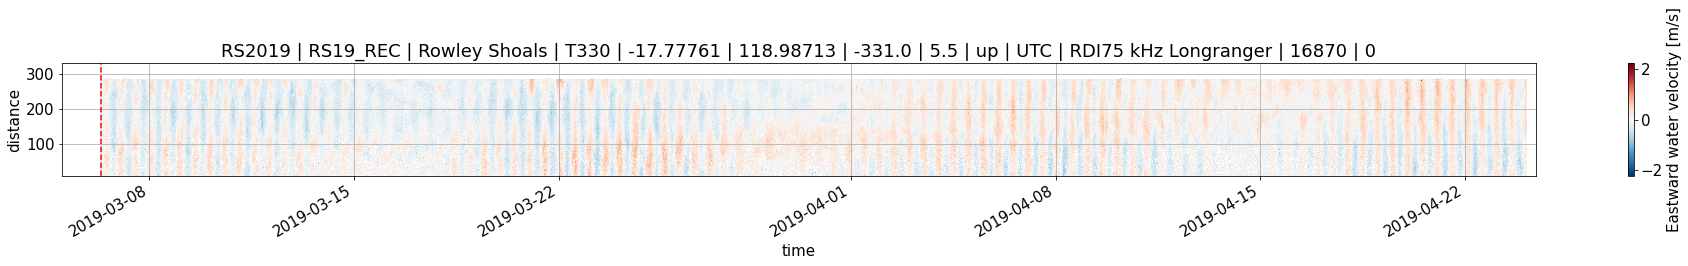

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\ADCP\T200_000.000
File exists

Reading file E:\Experiments\rs19\data/moored_instrument_data\raw_data\T200\ADCP\T200_000.000 ...
  Encountered end of file.  Cleaning up data.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\xrwrap\rdi_adcp.py:50: UserWarning: WARNING: ADCP CODE PREPARED FOR BEAM COORDS ONLY.
  warnings.warn('WARNING: ADCP CODE PREPARED FOR BEAM COORDS ONLY.')


Initialising accessor.
STORING RAW FILE ATTRIBUTES
_TYPE
NAME
SOURCEPROG
PROG_VER
CONFIG
BEAM_ANGLE
NUMBEAMS
BEAM_FREQ_KHZ
BEAM_PATTERN
ORIENTATION
SIMFLAG
N_BEAM
N_CELLS
PINGS_PER_ENSEMBLE
CELL_SIZE_M
BLANK_M
PROF_MODE
CORR_THRESHOLD
PROF_CODEREPS
MIN_PGOOD
EVEL_THRESHOLD
SEC_BETWEEN_PING_GROUPS
COORD
COORD_SYS
USE_PITCHROLL
USE_3BEAM
BIN_MAPPING
XDUCER_MISALIGN_DEG
MAGNETIC_VAR_DEG
SENSORS_SRC
SENSORS_AVAIL
BIN1_DIST_M
XMIT_PULSE
WATER_REF_CELLS
FLS_TARGET_THRESHOLD
XMIT_LAG_M
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Rotating...
ROTATING ON THE ASSUMPTION OF INSTR FACING up


c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\xrwrap\rdi_adcp.py:276: UserWarning: ROTATION WARNING: Should do rotations from self.ds NOT self._data.
  warnings.warn('ROTATION WARNING: Should do rotations from self.ds NOT self._data.')


Re-mapping beam data...
Done
[[ 1.4619022  -1.4619022   0.          0.        ]
 [ 0.          0.         -1.4619022   1.4619022 ]
 [ 0.26604444  0.26604444  0.26604444  0.26604444]
 [ 1.03372096  1.03372096 -1.03372096 -1.03372096]]
Adding pi to roll for up facing instrument
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Trimmed sidelobe
E:\Experiments\rs19\archive_FV01\RDI75 kHz Longranger
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\RDI75 kHz Longranger//[RS2019]_[RS19_REC]_[T200]_[550]_[RDI75 kHz Longranger]_[24613]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 534057 values.


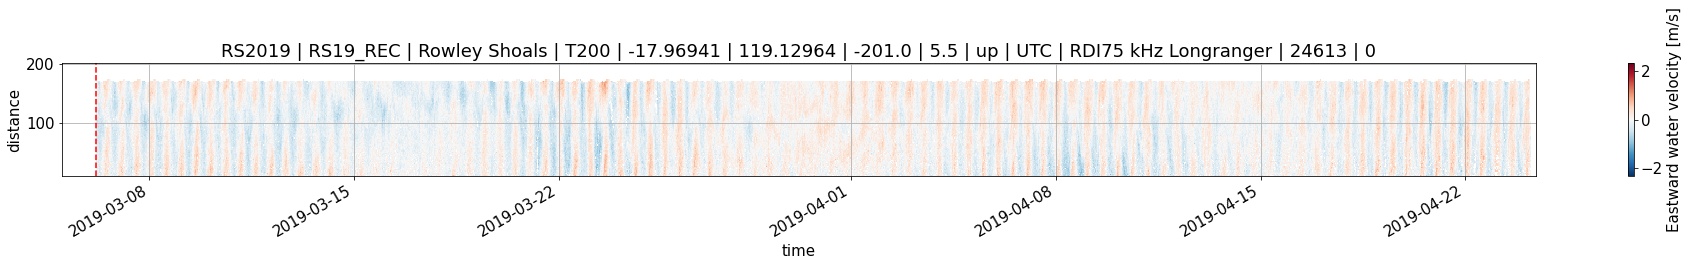

E:\Experiments\rs19\data/moored_instrument_data\raw_data\T150\ADCP\T150_000.000
File exists

Reading file E:\Experiments\rs19\data/moored_instrument_data\raw_data\T150\ADCP\T150_000.000 ...


c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\xrwrap\rdi_adcp.py:50: UserWarning: WARNING: ADCP CODE PREPARED FOR BEAM COORDS ONLY.
  warnings.warn('WARNING: ADCP CODE PREPARED FOR BEAM COORDS ONLY.')


Initialising accessor.
STORING RAW FILE ATTRIBUTES
_TYPE
NAME
SOURCEPROG
PROG_VER
CONFIG
BEAM_ANGLE
NUMBEAMS
BEAM_FREQ_KHZ
BEAM_PATTERN
ORIENTATION
SIMFLAG
N_BEAM
N_CELLS
PINGS_PER_ENSEMBLE
CELL_SIZE_M
BLANK_M
PROF_MODE
CORR_THRESHOLD
PROF_CODEREPS
MIN_PGOOD
EVEL_THRESHOLD
SEC_BETWEEN_PING_GROUPS
COORD
COORD_SYS
USE_PITCHROLL
USE_3BEAM
BIN_MAPPING
XDUCER_MISALIGN_DEG
MAGNETIC_VAR_DEG
SENSORS_SRC
SENSORS_AVAIL
BIN1_DIST_M
XMIT_PULSE
WATER_REF_CELLS
FLS_TARGET_THRESHOLD
XMIT_LAG_M
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Rotating...
ROTATING ON THE ASSUMPTION OF INSTR FACING up
Re-mapping beam data...


c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\xrwrap\rdi_adcp.py:276: UserWarning: ROTATION WARNING: Should do rotations from self.ds NOT self._data.
  warnings.warn('ROTATION WARNING: Should do rotations from self.ds NOT self._data.')


Done
[[ 1.4619022  -1.4619022   0.          0.        ]
 [ 0.          0.         -1.4619022   1.4619022 ]
 [ 0.26604444  0.26604444  0.26604444  0.26604444]
 [ 1.03372096  1.03372096 -1.03372096 -1.03372096]]
Adding pi to roll for up facing instrument
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Trimmed sidelobe
E:\Experiments\rs19\archive_FV01\RDI 150 kHz Quartermaster
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\RDI 150 kHz Quartermaster//[RS2019]_[RS19_REC]_[T150]_[550]_[RDI 150 kHz Quartermaster]_[11795]_[no_outfile_append].nc
Figure size is 69.0 x 8.0 cm
Blanking 292250 values.


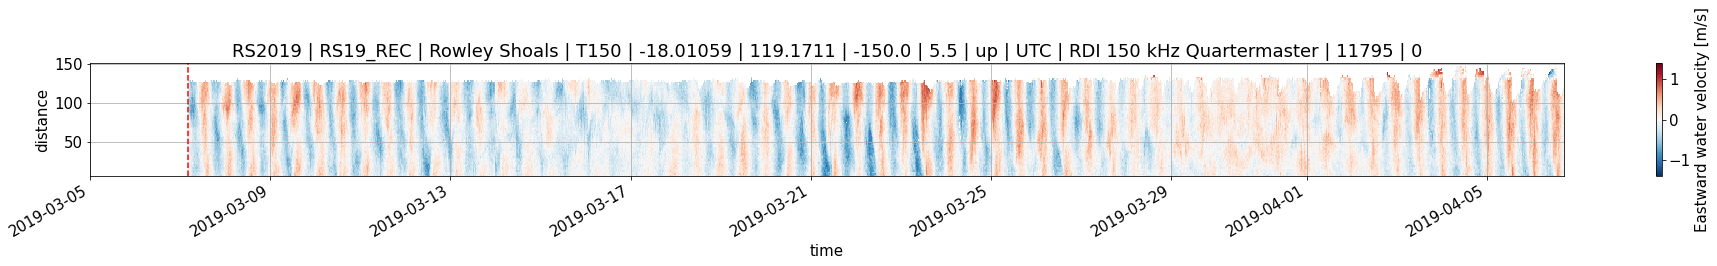

In [5]:

import pIMOS.xrwrap.rdi_adcp as rdi_adcp 

filetypes = ['RDI 150 kHz Quartermaster', 'RDI 300 kHz Monitor', 'RDI75 kHz Longranger', 'RDI 300 kHz Sentinel', 'RDI 300 kHz Monitor'];
# filetypes = ['RDI 150 kHz Quartermaster'];
# filetypes = ['RDI75 kHz Longranger'];

db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
moorings = db_data['possible_mooring_dates']['Mooring'].values

for index, row in db_data['autonomous_metadata'].iterrows():

    mooring = row['StationID'].strip()
    instrument = row['InstrumentType'].strip()
    sn = row['SerialNo'].strip()
    
    attributes = ai.row_to_attrs(row)
        
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in filetypes:

        pd0_filename = os.path.join(moored_data_root, row['FilePath'], row['FileName'])
        print(pd0_filename)

        if os.path.exists(pd0_filename):
            print('File exists')
        else:
            raise(Exception)

        rr, ds = rdi_adcp.from_pdo(pd0_filename, rotate=False, mapbins=True)

        rr.update_attributes_with_dict(attributes)

        rr._calc_rotations(mapbins=True) # Rotate now that we have the right orientation
        
        pqc.pimosInOutWaterQC(rr, mooring, db_data, experiment='rs2019', recovered='rs19_rec')
        pqc.pimosTiltVelocitySimpleQC(rr)
        pqc.pimosEchoIntensitySimpleQC(rr, thresh_1=45)
        pqc.pimosErrorVelocitySetQC(rr)
        pqc.pimosCorrMagVelocitySetQC(rr)
        pqc.pimosPercentGoodVelocitySetRDIQC(rr)

        # Keep the sidelobe interference like this for now, not using the IMOS methods.
        if not type(row['SidelobeInt'])==str:
            pass # 
        elif row['SidelobeInt'].lower() == 'pressure':
            rr._calc_sidelobe_trim()
        elif row['SidelobeInt'].lower() == 'seabed':
            rr._calc_sidelobe_trim(attributes['nominal_instrument_height_asb'])
        elif row['SidelobeInt'].lower() == 'nominal_depth':
            nd = abs(attributes['nominal_instrument_height_asb']+attributes['nominal_site_depth'])
            print('ND: {}'.format(nd))
            rr._calc_sidelobe_trim(nd)
        else:
            raise(Exception("Not recognised"))
        
        ai.pIMOS_export(rr, archive_dir, instrument, sn)

        fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='u',plotraw=False)

        png_path = rr.fullpath_last_export[0:-3] +'.png'
        fig.savefig(png_path, dpi=300)
        

# Now the Vectors

### Preprocessing steps
#### OPTION 1:
1. Remove "small files" [thinks that have only 1 KB or so] from the directory so that glob.glob doesn't try to read them
1. Run this code with a small number of nens so that you can see the dates of the files. 
2. Do a binary merge.
2. Repeat this, reading only the binary merged file.
#### OPTION 2:

### Tilt fix
<!-- Vector 6019 had a tile issue. This needs to be corrected. The correction I calculated was:

pitch = 0.3349 \
roll  = 1.9945

I need a clean way to apply this - for now it will just be in an if statement. 

As for tracking, should we have a xrwrap function that applies offsets or defaults in the case of broken or miscalibrated sensors?  -->
### Heading fix
Check Vectors and Check the WEL Solitons and trunklines project. Pretty sure one of there needed some correcting.   

### Frame int

- To be handled after turbulence calcs really

<!-- - 6019 is gone:
    - Bewteen 325 and 360 degrees [35 degrees]
    - Between 0 and 100 [100 degrees]
    - Between 190 and 270 [80 degrees]
- 6329 is gone:
    - Between 20 and 200 degrees [i.e. 180 degrees - easterly half]  -->
    
    

In [14]:
# # Merge step
# filetypes = ['Nortek Vector'];

# db_config = ai.parse_dbconfig(dbconfig_file)
# db_data = ai.read_db(dbconfig_file)
# moorings = db_data['possible_mooring_dates']['Mooring'].values

# for index, row in db_data['deployment_metadata'].iterrows():

#     mooring = row['StationID']
#     instrument = row['InstrumentType']
#     sn = row['SerialNo']
#     attributes = ai.row_to_attrs(row)
    
#     if not mooring.lower() in moorings:
#         print('Skipping ' + mooring)
#         continue

#     if instrument in filetypes:

#         filename_wc = os.path.join(moored_data_root, row['FilePath'], row['FileName'])
        
#         filenames = glob.glob(filename_wc)
#         if len(filenames) == 0:
#             print('Skipping ' + row['FileName'])
#             continue
        
#         ####### THIS IS A MERGE STEP 
#         merge_file = filename_wc = os.path.join(moored_data_root, row['FilePath'], 'merged_' + sn+'.vec')
        
#         if sn =='6017':
#             filenames_ = [filenames[i] for i in [1, 2, 0]]
#         elif sn =='6329':
#             filenames_ = [filenames[i] for i in [1, 2, 3, 0]]
#         elif sn =='6019':
#             filenames_ = [filenames[i] for i in [1, 2, 3, 0]]
#         else:
#             error
            
#         ####### THIS IS A MERGE STEP   
#         if not os.path.exists(merge_file):
#             print('Merging')
#             with open(merge_file, 'wb') as fm:
#                 for f in filenames_:
#                     with open(f, 'rb') as fi:
#                         fm.write(fi.read())

#         rr, ds = nortek_vector.from_vec(merge_file, driver='dallsporpoise', debug=False)
        
#         attributes['outfile_append'] = ('merge_of_{}_files'.format(len(filenames)))
#         rr.update_attributes_with_dict(attributes)
#         rr.ds

#         rr.ds = rr.ds.assign_coords({'time': rr.ds.datetime.values})
#         pqc.pimosInOutWaterQC(rr, mooring, db_data, experiment='rs2019', recovered='rs19_rec')
#         pqc.pimosCorrMagVelocitySetQC(rr, 85)
#         pqc.pimosFishDetectionQC(rr, 40)

#         ai.pIMOS_export(rr, archive_dir, instrument, str(sn)+'_'+os.path.split(merge_file)[1])

#         fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='pressure', plotraw=True)
#         png_path = rr.fullpath_last_export[0:-3] +'pressure.png'
#         fig.savefig(png_path, dpi=300)

#         error

# filenames

autonomous_metadata = ROWLEY_Instruments.csv

profiler_metadata = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv
autonomous_metadata = ROWLEY_Instruments.csv

profiler_metadata = ROWLEY_CTD_Logbook.csv

possible_mooring_dates = ROWLEY_possible_mooring_dates.csv
Reading whole file
Reading vec with dallsporpoise
2 of 1029105433 (1.94e-07%)
Reading file. 2 of 1029105433 (1.94e-07%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
Having to search for synch (current position 786)
Having to search for synch (current position 787)
Having to search for synch (current position 788)
Having to search for synch (current position 789)
Having to search for synch (current position 790)
Having to search for synch (c

288149524 of 1029105433 (28.0%)
Reading file. 288149524 of 1029105433 (28.0%)
      Time at 11583868 has been interpreted as None[nan]
      Time at 11583844 [last sys this chunk] has been interpreted as 2019-04-14 11:08:19.999997[737163.4641203703]
298440576 of 1029105433 (29.0%)
Reading file. 298440576 of 1029105433 (29.0%)
      Time at 11997578 has been interpreted as None[nan]
      Time at 11997572 [last sys this chunk] has been interpreted as 2019-04-14 14:43:48.999996[737163.613761574]
308731648 of 1029105433 (30.0%)
Reading file. 308731648 of 1029105433 (30.0%)
      Time at 12411290 has been interpreted as None[nan]
      Time at 12411268 [last sys this chunk] has been interpreted as 2019-04-14 18:19:17.000001[737163.7633912037]
319022700 of 1029105433 (31.0%)
Reading file. 319022700 of 1029105433 (31.0%)
      Time at 12825000 has been interpreted as None[nan]
      Time at 12824996 [last sys this chunk] has been interpreted as 2019-04-14 21:54:46[737163.9130324074]
32931374

627754336 of 1029105433 (61.0%)
Reading file. 627754336 of 1029105433 (61.0%)
      Time at 25236323 has been interpreted as None[nan]
      Time at 25236292 [last sys this chunk] has been interpreted as 2019-04-19 09:38:58.999997[737168.4020717592]
638045388 of 1029105433 (62.0%)
Reading file. 638045388 of 1029105433 (62.0%)
      Time at 25650033 has been interpreted as None[nan]
      Time at 25650020 [last sys this chunk] has been interpreted as 2019-04-19 13:14:27.999996[737168.5517129629]
648336436 of 1029105433 (63.0%)
Reading file. 648336436 of 1029105433 (63.0%)
      Time at 26063744 has been interpreted as None[nan]
      Time at 26063716 [last sys this chunk] has been interpreted as 2019-04-19 16:49:56[737168.7013425926]
658627488 of 1029105433 (64.0%)
Reading file. 658627488 of 1029105433 (64.0%)
      Time at 26477454 has been interpreted as None[nan]
      Time at 26477444 [last sys this chunk] has been interpreted as 2019-04-19 20:25:25[737168.8509837963]
668918536 of 1

967359128 of 1029105433 (94.0%)
Reading file. 967359128 of 1029105433 (94.0%)
      Time at 38888776 has been interpreted as None[nan]
      Time at 38888772 [last sys this chunk] has been interpreted as 2019-04-24 08:09:39.000001[737173.3400347222]
977650176 of 1029105433 (95.0%)
Reading file. 977650176 of 1029105433 (95.0%)
      Time at 39302487 has been interpreted as None[nan]
      Time at 39302468 [last sys this chunk] has been interpreted as 2019-04-24 11:45:06.999996[737173.4896643518]
987941228 of 1029105433 (96.0%)
Reading file. 987941228 of 1029105433 (96.0%)
      Time at 39716197 has been interpreted as None[nan]
      Time at 39716196 [last sys this chunk] has been interpreted as 2019-04-24 15:20:36.000005[737173.6393055556]
998232276 of 1029105433 (97.0%)
Reading file. 998232276 of 1029105433 (97.0%)
      Time at 40129908 has been interpreted as None[nan]
      Time at 40129892 [last sys this chunk] has been interpreted as 2019-04-24 18:56:03.999999[737173.7889351852]


c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[59]_[Nortek Vector]_[6017]_[1of3].nc
Figure size is 69.0 x 8.0 cm
Blanking 0 values.


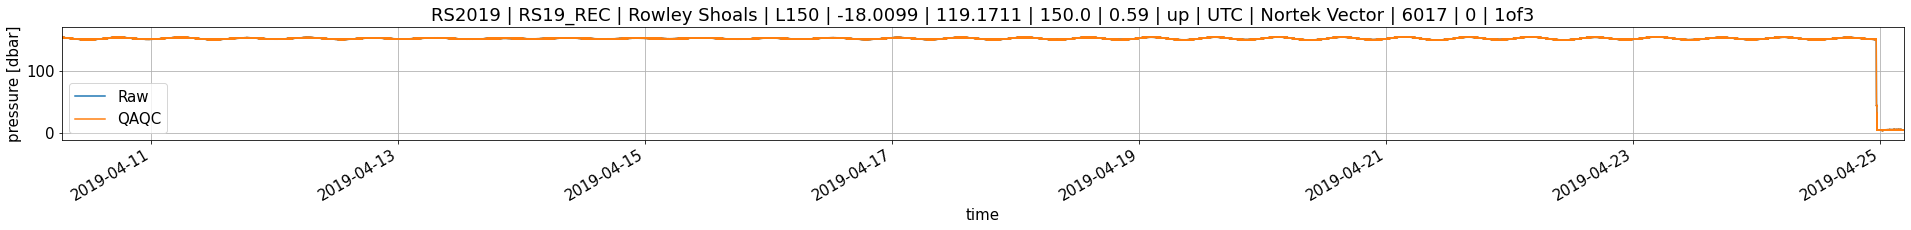

Reading whole file
Reading vec with dallsporpoise
2 of 1178599425 (1.7e-07%)
Reading file. 2 of 1178599425 (1.7e-07%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
MPLTIME NOT IN DAT, INITIALISING
VEL NOT IN DAT, INITIALISING
c has reset (happens when reading in chunks).
11786018 of 1178599425 (1.0%)
Reading file. 11786018 of 1178599425 (1.0%)
      Time at 473738 has been interpreted as None[nan]
      Time at 473729 [last sys this chunk] has been interpreted as 2019-03-07 04:06:47.000002[737125.1713773148]
23572002 of 1178599425 (2.0%)
Reading file. 23572002 of 1178599425 (2.0%)
      Time at 947547 has been interpreted as None[nan]
      Time at 947521 [last sys this chunk] has been interpreted as 2019-03-07 08:13:32.999999[737125

377151826 of 1178599425 (32.0%)
Reading file. 377151826 of 1178599425 (32.0%)
      Time at 15161811 has been interpreted as None[nan]
      Time at 15161793 [last sys this chunk] has been interpreted as 2019-03-12 11:36:49.000001[737130.483900463]
388937814 of 1178599425 (33.0%)
Reading file. 388937814 of 1178599425 (33.0%)
      Time at 15635619 has been interpreted as None[nan]
      Time at 15635617 [last sys this chunk] has been interpreted as 2019-03-12 15:43:36.000003[737130.6552777778]
400723822 of 1178599425 (34.0%)
Reading file. 400723822 of 1178599425 (34.0%)
      Time at 16109429 has been interpreted as None[nan]
      Time at 16109409 [last sys this chunk] has been interpreted as 2019-03-12 19:50:22[737130.8266435185]
412509810 of 1178599425 (35.0%)
Reading file. 412509810 of 1178599425 (35.0%)
      Time at 16583237 has been interpreted as None[nan]
      Time at 16583233 [last sys this chunk] has been interpreted as 2019-03-12 23:57:09.000002[737130.9980208334]
42429579

766089630 of 1178599425 (65.0%)
Reading file. 766089630 of 1178599425 (65.0%)
      Time at 30797502 has been interpreted as None[nan]
      Time at 30797473 [last sys this chunk] has been interpreted as 2019-03-18 03:20:23.999999[737136.1391666667]
777875642 of 1178599425 (66.0%)
Reading file. 777875642 of 1178599425 (66.0%)
      Time at 31271311 has been interpreted as None[nan]
      Time at 31271297 [last sys this chunk] has been interpreted as 2019-03-18 07:27:11.000001[737136.3105439815]
789661626 of 1178599425 (67.0%)
Reading file. 789661626 of 1178599425 (67.0%)
      Time at 31745120 has been interpreted as None[nan]
      Time at 31745089 [last sys this chunk] has been interpreted as 2019-03-18 11:33:56.999999[737136.4819097222]
801447614 of 1178599425 (68.0%)
Reading file. 801447614 of 1178599425 (68.0%)
      Time at 32218928 has been interpreted as None[nan]
      Time at 32218913 [last sys this chunk] has been interpreted as 2019-03-18 15:40:44.000001[737136.653287037]
8

1155027438 of 1178599425 (98.0%)
Reading file. 1155027438 of 1178599425 (98.0%)
      Time at 46433192 has been interpreted as None[nan]
      Time at 46433185 [last sys this chunk] has been interpreted as 2019-03-23 19:04:00.000002[737141.7944444445]
1166813446 of 1178599425 (99.0%)
Reading file. 1166813446 of 1178599425 (99.0%)
      Time at 46907002 has been interpreted as None[nan]
      Time at 46906977 [last sys this chunk] has been interpreted as 2019-03-23 23:10:46[737141.9658101852]
EOFError: Reached the end of the file successfully.
Converting to scientific units.
There are 1480652 non nan times.
There are no bursts so were going to cheat.
nburst is 48086496
Interpolating SEN variables
     Prior to interpolation there were 46605844 nans of 48086496 elements in heading!
Chunk spans 2019-03-07 00:00:03.000245 to 2019-03-24 09:25:05.936511
Converting mpltime to date. Expect delays!
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[59]_[Nortek Vector]_[6017]_[2of3].nc
Figure size is 69.0 x 8.0 cm
Blanking 0 values.


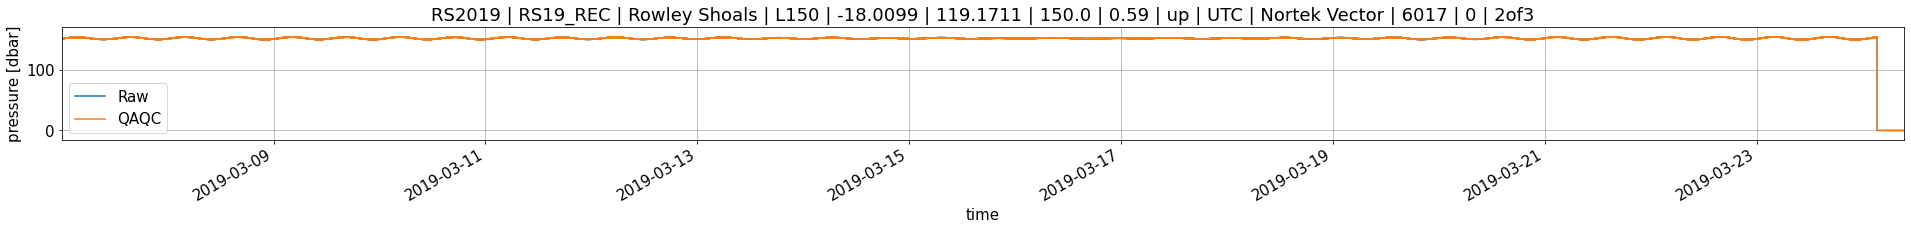

Reading whole file
Reading vec with dallsporpoise
2 of 1178599425 (1.7e-07%)
Reading file. 2 of 1178599425 (1.7e-07%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
Having to search for synch (current position 786)
Having to search for synch (current position 787)
Having to search for synch (current position 788)
Having to search for synch (current position 789)
Having to search for synch (current position 790)
Having to search for synch (current position 791)
Having to search for synch (current position 792)
VEL NOT IN DAT, INITIALISING
c has reset (happens when reading in chunks).
MPLTIME NOT IN DAT, INITIALISING
11786005 of 1178599425 (1.0%)
Reading file. 11786005 of 1178599425 (1.0%)
      Time at 473778 has been interpreted as No

365365829 of 1178599425 (31.0%)
Reading file. 365365829 of 1178599425 (31.0%)
      Time at 14688042 has been interpreted as None[nan]
      Time at 14688023 [last sys this chunk] has been interpreted as 2019-03-29 10:47:33.999996[737147.449699074]
377151817 of 1178599425 (32.0%)
Reading file. 377151817 of 1178599425 (32.0%)
      Time at 15161850 has been interpreted as None[nan]
      Time at 15161847 [last sys this chunk] has been interpreted as 2019-03-29 14:54:20.999998[737147.6210763889]
388937825 of 1178599425 (33.0%)
Reading file. 388937825 of 1178599425 (33.0%)
      Time at 15635660 has been interpreted as None[nan]
      Time at 15635639 [last sys this chunk] has been interpreted as 2019-03-29 19:01:06.999995[737147.7924421296]
400723813 of 1178599425 (34.0%)
Reading file. 400723813 of 1178599425 (34.0%)
      Time at 16109468 has been interpreted as None[nan]
      Time at 16109463 [last sys this chunk] has been interpreted as 2019-03-29 23:07:53.999997[737147.9638194444]
4

754303633 of 1178599425 (64.0%)
Reading file. 754303633 of 1178599425 (64.0%)
      Time at 30323733 has been interpreted as None[nan]
      Time at 30323703 [last sys this chunk] has been interpreted as 2019-04-04 02:31:09.000005[737153.1049652778]
766089645 of 1178599425 (65.0%)
Reading file. 766089645 of 1178599425 (65.0%)
      Time at 30797542 has been interpreted as None[nan]
      Time at 30797527 [last sys this chunk] has been interpreted as 2019-04-04 06:37:55.999996[737153.2763425926]
777875629 of 1178599425 (66.0%)
Reading file. 777875629 of 1178599425 (66.0%)
      Time at 31271351 has been interpreted as None[nan]
      Time at 31271319 [last sys this chunk] has been interpreted as 2019-04-04 10:44:42.000004[737153.4477083334]
789661617 of 1178599425 (67.0%)
Reading file. 789661617 of 1178599425 (67.0%)
      Time at 31745159 has been interpreted as None[nan]
      Time at 31745143 [last sys this chunk] has been interpreted as 2019-04-04 14:51:28.999996[737153.6190856481]


1143241465 of 1178599425 (97.0%)
Reading file. 1143241465 of 1178599425 (97.0%)
      Time at 45959424 has been interpreted as None[nan]
      Time at 45959415 [last sys this chunk] has been interpreted as 2019-04-09 18:14:44.999998[737158.7602430555]
1155027449 of 1178599425 (98.0%)
Reading file. 1155027449 of 1178599425 (98.0%)
      Time at 46433233 has been interpreted as None[nan]
      Time at 46433207 [last sys this chunk] has been interpreted as 2019-04-09 22:21:31.000005[737158.9316087964]
1166813437 of 1178599425 (99.0%)
Reading file. 1166813437 of 1178599425 (99.0%)
      Time at 46907041 has been interpreted as None[nan]
      Time at 46907031 [last sys this chunk] has been interpreted as 2019-04-10 02:28:17.999997[737159.1029861111]
EOFError: Reached the end of the file successfully.
Converting to scientific units.
There are 1480651 non nan times.
There are no bursts so were going to cheat.
nburst is 47659904
Interpolating SEN variables
     Prior to interpolation there we

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[59]_[Nortek Vector]_[6017]_[3of3].nc
Figure size is 69.0 x 8.0 cm
Blanking 0 values.


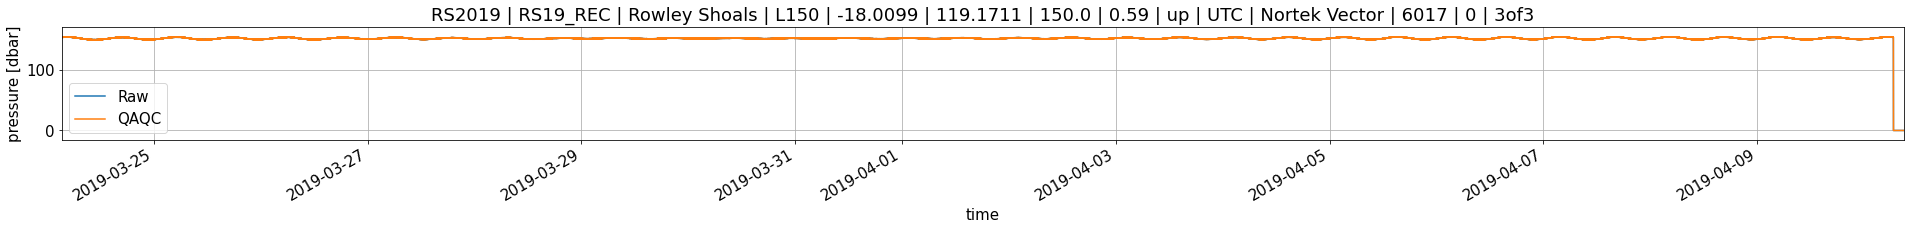

Reading whole file
Reading vec with dallsporpoise
2 of 31864897 (6.28e-06%)
Reading file. 2 of 31864897 (6.28e-06%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
MPLTIME NOT IN DAT, INITIALISING
VEL NOT IN DAT, INITIALISING
c has reset (happens when reading in chunks).
318654 of 31864897 (1.0%)
Reading file. 318654 of 31864897 (1.0%)
      Time at 12660 has been interpreted as None[nan]
      Time at 12643 [last sys this chunk] has been interpreted as 2019-04-24 04:55:54[737173.2054861111]
637310 of 31864897 (2.0%)
Reading file. 637310 of 31864897 (2.0%)
      Time at 25431 has been interpreted as None[nan]
      Time at 25412 [last sys this chunk] has been interpreted as 2019-04-24 05:12:33.999997[737173.2170601852]
955950 of 318648

10834074 of 31864897 (34.0%)
Reading file. 10834074 of 31864897 (34.0%)
      Time at 434839 has been interpreted as None[nan]
      Time at 434833 [last sys this chunk] has been interpreted as 2019-04-24 10:56:01.000002[737173.4555671297]
11152714 of 31864897 (35.0%)
Reading file. 11152714 of 31864897 (35.0%)
      Time at 447649 has been interpreted as None[nan]
      Time at 447633 [last sys this chunk] has been interpreted as 2019-04-24 11:02:40.999995[737173.4601967592]
11471378 of 31864897 (36.0%)
Reading file. 11471378 of 31864897 (36.0%)
      Time at 460460 has been interpreted as None[nan]
      Time at 460433 [last sys this chunk] has been interpreted as 2019-04-24 11:09:20.999998[737173.4648263889]
11790022 of 31864897 (37.0%)
Reading file. 11790022 of 31864897 (37.0%)
      Time at 473269 has been interpreted as None[nan]
      Time at 473265 [last sys this chunk] has been interpreted as 2019-04-24 11:16:01.999996[737173.4694675925]
12108662 of 31864897 (38.0%)
Reading fil

21986794 of 31864897 (69.0%)
Reading file. 21986794 of 31864897 (69.0%)
      Time at 882836 has been interpreted as None[nan]
      Time at 882810 [last sys this chunk] has been interpreted as 2019-04-24 16:19:29.000003[737173.6801967593]
22305450 of 31864897 (70.0%)
Reading file. 22305450 of 31864897 (70.0%)
      Time at 895607 has been interpreted as None[nan]
      Time at 895579 [last sys this chunk] has been interpreted as 2019-04-24 16:36:09[737173.6917708333]
22624094 of 31864897 (71.0%)
Reading file. 22624094 of 31864897 (71.0%)
      Time at 908416 has been interpreted as None[nan]
      Time at 908411 [last sys this chunk] has been interpreted as 2019-04-24 16:42:49.999998[737173.696412037]
22942734 of 31864897 (72.0%)
Reading file. 22942734 of 31864897 (72.0%)
      Time at 921226 has been interpreted as None[nan]
      Time at 921211 [last sys this chunk] has been interpreted as 2019-04-24 16:49:30.000001[737173.7010416667]
23261398 of 31864897 (73.0%)
Reading file. 23261

There are 40018 non nan times.
There are no bursts so were going to cheat.
nburst is 1300096
Interpolating SEN variables
     Prior to interpolation there were 1260078 nans of 1300096 elements in heading!
Chunk spans 2019-04-24 04:14:30.384111 to 2019-04-24 23:40:19.623652
Converting mpltime to date. Expect delays!
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
Converted. How were those delays?
Initialising accessor.
STORING RAW FILE ATTRIBUTES
CONFIG:FS
CONFIG:HARDWARE:FWVERSION
CONFIG:HARDWARE:HWREVISION
CONFIG:HARDWARE:PICVERSION
CONFIG:HARDWARE:PROLOGFWVER
CONFIG:HARDWARE:PROLOGID
CONFIG:HARDWARE:CONFIG
CONFIG:HARDWARE:RECSIZE
CONFIG:HARDWARE:SERIALNUM
CONFIG:HARDWARE:STATUS
CONFIG:HEAD:NBEAMS
CONFIG:HEAD:TRANSMATRIX
CONFIG:HEAD:TRANSMATRIX_HOWTOTEADINNUMPY
CONFIG:HEAD:CONFIG
CONFIG:HEAD:FREQ
CONFIG:HEAD:SERIALNUM
CONFIG:HEAD:TYPE
CONFIG:USE

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[81]_[Nortek Vector]_[6329]_[1of4].nc
Figure size is 69.0 x 8.0 cm
Blanking 0 values.


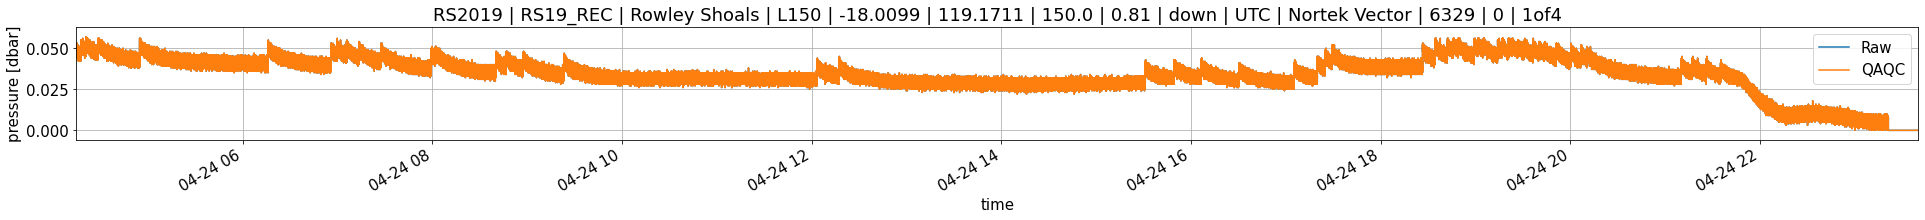

Reading whole file
Reading vec with dallsporpoise
2 of 1178599425 (1.7e-07%)
Reading file. 2 of 1178599425 (1.7e-07%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
MPLTIME NOT IN DAT, INITIALISING
VEL NOT IN DAT, INITIALISING
c has reset (happens when reading in chunks).
11786018 of 1178599425 (1.0%)
Reading file. 11786018 of 1178599425 (1.0%)
      Time at 473738 has been interpreted as None[nan]
      Time at 473729 [last sys this chunk] has been interpreted as 2019-03-04 08:06:46.999999[737122.3380439815]
23572002 of 1178599425 (2.0%)
Reading file. 23572002 of 1178599425 (2.0%)
      Time at 947547 has been interpreted as None[nan]
      Time at 947521 [last sys this chunk] has been interpreted as 2019-03-04 12:13:32.999996[737122

377151826 of 1178599425 (32.0%)
Reading file. 377151826 of 1178599425 (32.0%)
      Time at 15161811 has been interpreted as None[nan]
      Time at 15161793 [last sys this chunk] has been interpreted as 2019-03-09 15:36:48.999998[737127.6505671296]
388937814 of 1178599425 (33.0%)
Reading file. 388937814 of 1178599425 (33.0%)
      Time at 15635619 has been interpreted as None[nan]
      Time at 15635617 [last sys this chunk] has been interpreted as 2019-03-09 19:43:36[737127.8219444444]
400723822 of 1178599425 (34.0%)
Reading file. 400723822 of 1178599425 (34.0%)
      Time at 16109429 has been interpreted as None[nan]
      Time at 16109409 [last sys this chunk] has been interpreted as 2019-03-09 23:50:21.999997[737127.9933101851]
412509810 of 1178599425 (35.0%)
Reading file. 412509810 of 1178599425 (35.0%)
      Time at 16583237 has been interpreted as None[nan]
      Time at 16583233 [last sys this chunk] has been interpreted as 2019-03-10 03:57:08.999999[737128.1646875]
424295794 

766089630 of 1178599425 (65.0%)
Reading file. 766089630 of 1178599425 (65.0%)
      Time at 30797502 has been interpreted as None[nan]
      Time at 30797473 [last sys this chunk] has been interpreted as 2019-03-15 07:20:23.999996[737133.3058333333]
777875642 of 1178599425 (66.0%)
Reading file. 777875642 of 1178599425 (66.0%)
      Time at 31271311 has been interpreted as None[nan]
      Time at 31271297 [last sys this chunk] has been interpreted as 2019-03-15 11:27:10.999998[737133.4772106481]
789661626 of 1178599425 (67.0%)
Reading file. 789661626 of 1178599425 (67.0%)
      Time at 31745120 has been interpreted as None[nan]
      Time at 31745089 [last sys this chunk] has been interpreted as 2019-03-15 15:33:56.999995[737133.6485763888]
801447614 of 1178599425 (68.0%)
Reading file. 801447614 of 1178599425 (68.0%)
      Time at 32218928 has been interpreted as None[nan]
      Time at 32218913 [last sys this chunk] has been interpreted as 2019-03-15 19:40:43.999997[737133.8199537037]


1155027438 of 1178599425 (98.0%)
Reading file. 1155027438 of 1178599425 (98.0%)
      Time at 46433192 has been interpreted as None[nan]
      Time at 46433185 [last sys this chunk] has been interpreted as 2019-03-20 23:03:59.999999[737138.9611111111]
1166813446 of 1178599425 (99.0%)
Reading file. 1166813446 of 1178599425 (99.0%)
      Time at 46907002 has been interpreted as None[nan]
      Time at 46906977 [last sys this chunk] has been interpreted as 2019-03-21 03:10:45.999996[737139.1324768518]
IndexError: May have reached the end of file earlier than expected. Passing to end now.
Converting to scientific units.
There are 1472809 non nan times.
There are no bursts so were going to cheat.
nburst is 47129856
Interpolating SEN variables
     Prior to interpolation there were 45657047 nans of 47129856 elements in heading!
Chunk spans 2019-03-04 04:00:02.998864 to 2019-03-21 05:06:50.938480
Converting mpltime to date. Expect delays!
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZU

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[81]_[Nortek Vector]_[6329]_[2of4].nc
Figure size is 69.0 x 8.0 cm
Blanking 3340714 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


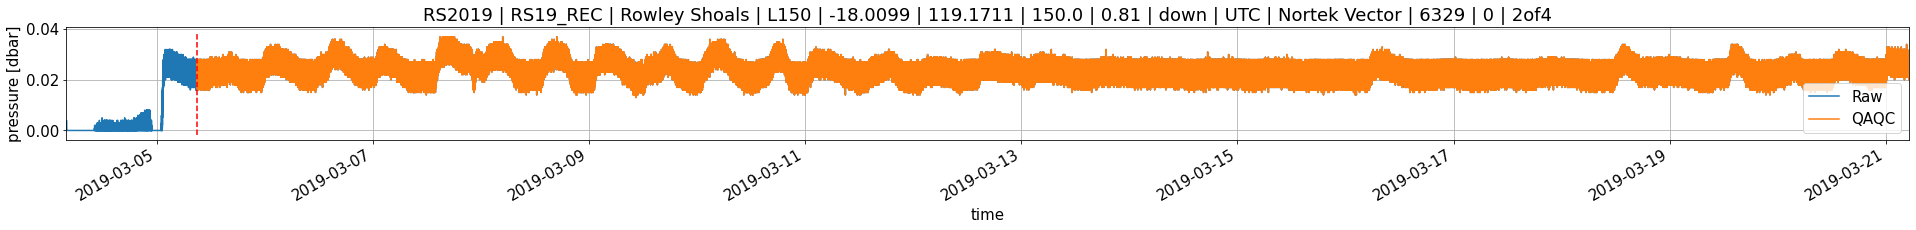

<timed exec>:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


Reading whole file
Reading vec with dallsporpoise
2 of 1178599425 (1.7e-07%)
Reading file. 2 of 1178599425 (1.7e-07%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
Having to search for synch (current position 786)
Having to search for synch (current position 787)
Having to search for synch (current position 788)
Having to search for synch (current position 789)
Having to search for synch (current position 790)
Having to search for synch (current position 791)
Having to search for synch (current position 792)
VEL NOT IN DAT, INITIALISING
c has reset (happens when reading in chunks).
MPLTIME NOT IN DAT, INITIALISING
11786005 of 1178599425 (1.0%)
Reading file. 11786005 of 1178599425 (1.0%)
      Time at 473778 has been interpreted as No

365365829 of 1178599425 (31.0%)
Reading file. 365365829 of 1178599425 (31.0%)
      Time at 14688042 has been interpreted as None[nan]
      Time at 14688023 [last sys this chunk] has been interpreted as 2019-03-26 14:47:34.000003[737144.6163657408]
377151817 of 1178599425 (32.0%)
Reading file. 377151817 of 1178599425 (32.0%)
      Time at 15161850 has been interpreted as None[nan]
      Time at 15161847 [last sys this chunk] has been interpreted as 2019-03-26 18:54:21.000005[737144.7877430556]
388937825 of 1178599425 (33.0%)
Reading file. 388937825 of 1178599425 (33.0%)
      Time at 15635660 has been interpreted as None[nan]
      Time at 15635639 [last sys this chunk] has been interpreted as 2019-03-26 23:01:07.000002[737144.9591087963]
400723813 of 1178599425 (34.0%)
Reading file. 400723813 of 1178599425 (34.0%)
      Time at 16109468 has been interpreted as None[nan]
      Time at 16109463 [last sys this chunk] has been interpreted as 2019-03-27 03:07:54.000004[737145.1304861112]


754303633 of 1178599425 (64.0%)
Reading file. 754303633 of 1178599425 (64.0%)
      Time at 30323733 has been interpreted as None[nan]
      Time at 30323703 [last sys this chunk] has been interpreted as 2019-04-01 06:31:09.000001[737150.2716319445]
766089645 of 1178599425 (65.0%)
Reading file. 766089645 of 1178599425 (65.0%)
      Time at 30797542 has been interpreted as None[nan]
      Time at 30797527 [last sys this chunk] has been interpreted as 2019-04-01 10:37:56.000003[737150.4430092593]
777875629 of 1178599425 (66.0%)
Reading file. 777875629 of 1178599425 (66.0%)
      Time at 31271351 has been interpreted as None[nan]
      Time at 31271319 [last sys this chunk] has been interpreted as 2019-04-01 14:44:42[737150.614375]
789661617 of 1178599425 (67.0%)
Reading file. 789661617 of 1178599425 (67.0%)
      Time at 31745159 has been interpreted as None[nan]
      Time at 31745143 [last sys this chunk] has been interpreted as 2019-04-01 18:51:29.000002[737150.7857523148]
801447629 o

1143241465 of 1178599425 (97.0%)
Reading file. 1143241465 of 1178599425 (97.0%)
      Time at 45959424 has been interpreted as None[nan]
      Time at 45959415 [last sys this chunk] has been interpreted as 2019-04-06 22:14:45.000004[737155.9269097223]
1155027449 of 1178599425 (98.0%)
Reading file. 1155027449 of 1178599425 (98.0%)
      Time at 46433233 has been interpreted as None[nan]
      Time at 46433207 [last sys this chunk] has been interpreted as 2019-04-07 02:21:31.000002[737156.098275463]
1166813437 of 1178599425 (99.0%)
Reading file. 1166813437 of 1178599425 (99.0%)
      Time at 46907041 has been interpreted as None[nan]
      Time at 46907031 [last sys this chunk] has been interpreted as 2019-04-07 06:28:18.000003[737156.2696527778]
EOFError: Reached the end of the file successfully.
Converting to scientific units.
There are 1480651 non nan times.
There are no bursts so were going to cheat.
nburst is 47659904
Interpolating SEN variables
     Prior to interpolation there wer

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[81]_[Nortek Vector]_[6329]_[3of4].nc
Figure size is 69.0 x 8.0 cm
Blanking 0 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


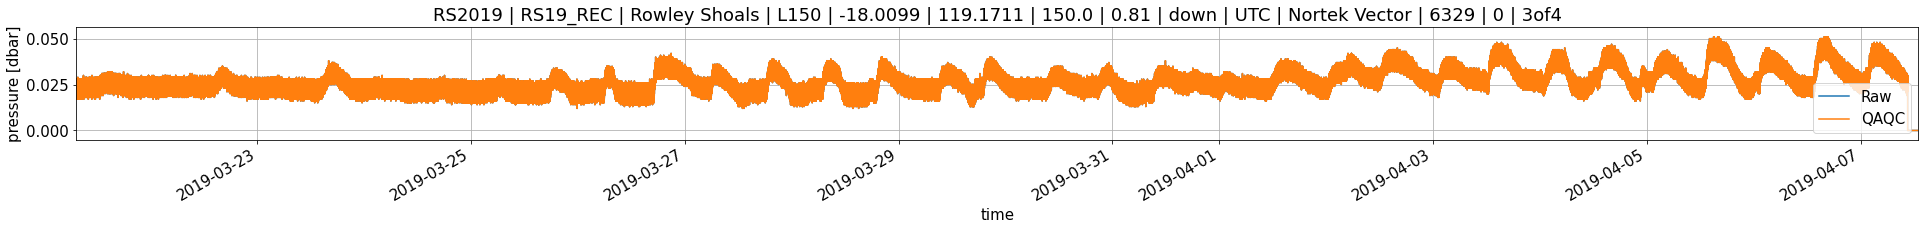

<timed exec>:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


Reading whole file
Reading vec with dallsporpoise
2 of 1151214306 (1.74e-07%)
Reading file. 2 of 1151214306 (1.74e-07%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
Having to search for synch (current position 786)
Having to search for synch (current position 787)
Having to search for synch (current position 788)
Having to search for synch (current position 789)
Having to search for synch (current position 790)
Having to search for synch (current position 791)
Having to search for synch (current position 792)
Having to search for synch (current position 793)
Having to search for synch (current position 794)
Having to search for synch (current position 795)
Having to search for synch (current position 796)
Having to search for synch 

333852156 of 1151214306 (29.0%)
Reading file. 333852156 of 1151214306 (29.0%)
      Time at 13421159 has been interpreted as None[nan]
      Time at 13421156 [last sys this chunk] has been interpreted as 2019-04-12 07:05:16.000003[737161.2953240741]
345364292 of 1151214306 (30.0%)
Reading file. 345364292 of 1151214306 (30.0%)
      Time at 13883959 has been interpreted as None[nan]
      Time at 13883940 [last sys this chunk] has been interpreted as 2019-04-12 11:06:18.000005[737161.4627083334]
356876456 of 1151214306 (31.0%)
Reading file. 356876456 of 1151214306 (31.0%)
      Time at 14346759 has been interpreted as None[nan]
      Time at 14346756 [last sys this chunk] has been interpreted as 2019-04-12 15:07:21.000002[737161.6301041667]
368388592 of 1151214306 (32.0%)
Reading file. 368388592 of 1151214306 (32.0%)
      Time at 14809559 has been interpreted as None[nan]
      Time at 14809540 [last sys this chunk] has been interpreted as 2019-04-12 19:08:23.000004[737161.797488426]
3

713752876 of 1151214306 (62.0%)
Reading file. 713752876 of 1151214306 (62.0%)
      Time at 28693550 has been interpreted as None[nan]
      Time at 28693540 [last sys this chunk] has been interpreted as 2019-04-17 19:39:38.000003[737166.8191898149]
725265036 of 1151214306 (63.0%)
Reading file. 725265036 of 1151214306 (63.0%)
      Time at 29156351 has been interpreted as None[nan]
      Time at 29156324 [last sys this chunk] has been interpreted as 2019-04-17 23:40:39.999995[737166.986574074]
736777176 of 1151214306 (64.0%)
Reading file. 736777176 of 1151214306 (64.0%)
      Time at 29619150 has been interpreted as None[nan]
      Time at 29619140 [last sys this chunk] has been interpreted as 2019-04-18 03:41:43.000002[737167.1539699074]
748289312 of 1151214306 (65.0%)
Reading file. 748289312 of 1151214306 (65.0%)
      Time at 30081950 has been interpreted as None[nan]
      Time at 30081924 [last sys this chunk] has been interpreted as 2019-04-18 07:42:45.000005[737167.3213541667]
7

1093653596 of 1151214306 (95.0%)
Reading file. 1093653596 of 1151214306 (95.0%)
      Time at 43965941 has been interpreted as None[nan]
      Time at 43965924 [last sys this chunk] has been interpreted as 2019-04-23 08:14:00.000004[737172.3430555556]
1105165736 of 1151214306 (96.0%)
Reading file. 1105165736 of 1151214306 (96.0%)
      Time at 44428740 has been interpreted as 2019-04-23 12:15:03[737172.5104513889]
      Time at 44428740 [last sys this chunk] has been interpreted as 2019-04-23 12:15:03[737172.5104513889]
1116677896 of 1151214306 (97.0%)
Reading file. 1116677896 of 1151214306 (97.0%)
      Time at 44891541 has been interpreted as None[nan]
      Time at 44891524 [last sys this chunk] has been interpreted as 2019-04-23 16:16:05.000003[737172.6778356482]
1128190036 of 1151214306 (98.0%)
Reading file. 1128190036 of 1151214306 (98.0%)
      Time at 45354340 has been interpreted as 2019-04-23 20:17:08[737172.8452314815]
      Time at 45354340 [last sys this chunk] has been in

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[81]_[Nortek Vector]_[6329]_[4of4].nc
Figure size is 69.0 x 8.0 cm
Blanking 0 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


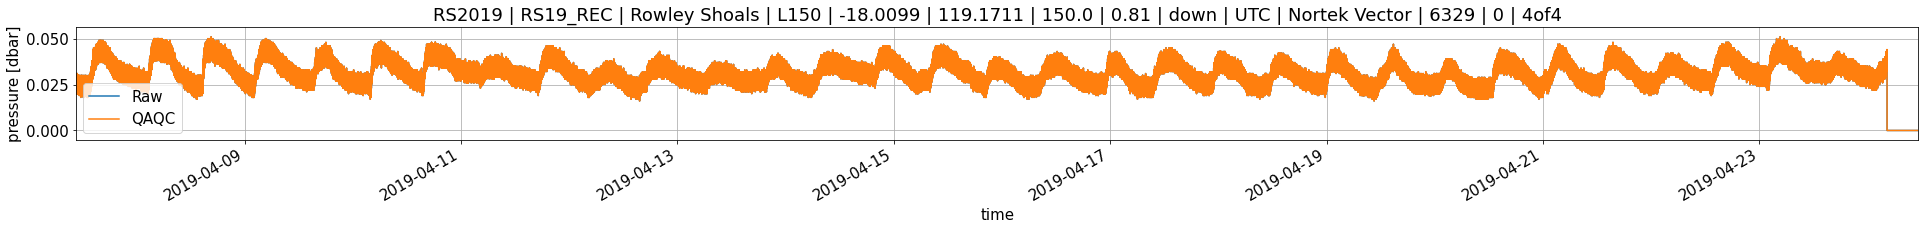

<timed exec>:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


Reading whole file
Reading vec with dallsporpoise
2 of 44196369 (4.53e-06%)
Reading file. 2 of 44196369 (4.53e-06%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
Having to search for synch (current position 786)
Having to search for synch (current position 787)
Having to search for synch (current position 788)
Having to search for synch (current position 789)
Having to search for synch (current position 790)
Having to search for synch (current position 791)
Having to search for synch (current position 792)
Having to search for synch (current position 793)
Having to search for synch (current position 794)
VEL NOT IN DAT, INITIALISING
c has reset (happens when reading in chunks).
MPLTIME NOT IN DAT, INITIALISING
441971 of 44196369 (1.0

14142843 of 44196369 (32.0%)
Reading file. 14142843 of 44196369 (32.0%)
      Time at 568525 has been interpreted as None[nan]
      Time at 568499 [last sys this chunk] has been interpreted as 2019-04-24 18:48:42.000003[737173.7838194445]
14584819 of 44196369 (33.0%)
Reading file. 14584819 of 44196369 (33.0%)
      Time at 586292 has been interpreted as None[nan]
      Time at 586291 [last sys this chunk] has been interpreted as 2019-04-24 18:57:58.000005[737173.7902546297]
15026767 of 44196369 (34.0%)
Reading file. 15026767 of 44196369 (34.0%)
      Time at 604059 has been interpreted as None[nan]
      Time at 604051 [last sys this chunk] has been interpreted as 2019-04-24 19:07:13.000002[737173.7966782408]
15468739 of 44196369 (35.0%)
Reading file. 15468739 of 44196369 (35.0%)
      Time at 621827 has been interpreted as None[nan]
      Time at 621811 [last sys this chunk] has been interpreted as 2019-04-24 19:16:27.999999[737173.8031018518]
15910711 of 44196369 (36.0%)
Reading fil

29611583 of 44196369 (67.0%)
Reading file. 29611583 of 44196369 (67.0%)
      Time at 1190384 has been interpreted as None[nan]
      Time at 1190355 [last sys this chunk] has been interpreted as 2019-04-25 00:12:34.999999[737174.0087384259]
30053535 of 44196369 (68.0%)
Reading file. 30053535 of 44196369 (68.0%)
      Time at 1208150 has been interpreted as None[nan]
      Time at 1208147 [last sys this chunk] has been interpreted as 2019-04-25 00:21:51[737174.0151736111]
30495507 of 44196369 (69.0%)
Reading file. 30495507 of 44196369 (69.0%)
      Time at 1225918 has been interpreted as None[nan]
      Time at 1225907 [last sys this chunk] has been interpreted as 2019-04-25 00:31:05.999997[737174.0215972222]
30937479 of 44196369 (70.0%)
Reading file. 30937479 of 44196369 (70.0%)
      Time at 1243686 has been interpreted as None[nan]
      Time at 1243667 [last sys this chunk] has been interpreted as 2019-04-25 00:40:21.000005[737174.0280208334]
31379427 of 44196369 (71.0%)
Reading fi

Chunk spans 2019-04-24 13:52:36.437392 to 2019-04-25 05:25:40.375293
Converting mpltime to date. Expect delays!
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
Converted. How were those delays?
Initialising accessor.
STORING RAW FILE ATTRIBUTES
CONFIG:FS
CONFIG:HARDWARE:FWVERSION
CONFIG:HARDWARE:HWREVISION
CONFIG:HARDWARE:PICVERSION
CONFIG:HARDWARE:PROLOGFWVER
CONFIG:HARDWARE:PROLOGID
CONFIG:HARDWARE:CONFIG
CONFIG:HARDWARE:RECSIZE
CONFIG:HARDWARE:SERIALNUM
CONFIG:HARDWARE:STATUS
CONFIG:HEAD:NBEAMS
CONFIG:HEAD:TRANSMATRIX
CONFIG:HEAD:TRANSMATRIX_HOWTOTEADINNUMPY
CONFIG:HEAD:CONFIG
CONFIG:HEAD:FREQ
CONFIG:HEAD:SERIALNUM
CONFIG:HEAD:TYPE
CONFIG:USER:ADJSOUNDSPEED
CONFIG:USER:ANAINADDR
CONFIG:USER:ANAOUTSCALE
CONFIG:USER:AVGINTERVAL
CONFIG:USER:B0
CONFIG:USER:B1
CONFIG:USER:BINLENGTH
CONFIG:USER:BURSTMODE
CONFIG:USER:COMMENTS
CONFIG:USER:COMPASSUPDRA

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[128]_[Nortek Vector]_[6019]_[1of4].nc
Figure size is 69.0 x 8.0 cm
Blanking 0 values.


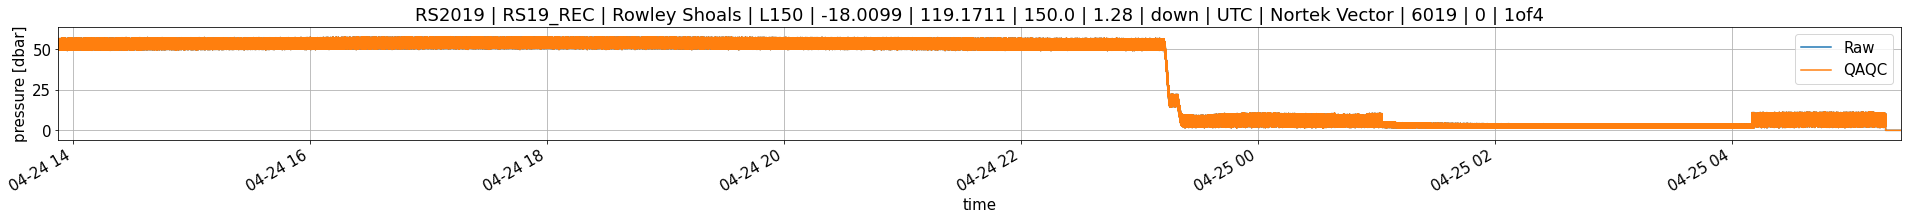

Reading whole file
Reading vec with dallsporpoise
2 of 1178599425 (1.7e-07%)
Reading file. 2 of 1178599425 (1.7e-07%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
MPLTIME NOT IN DAT, INITIALISING
VEL NOT IN DAT, INITIALISING
c has reset (happens when reading in chunks).
11786018 of 1178599425 (1.0%)
Reading file. 11786018 of 1178599425 (1.0%)
      Time at 473738 has been interpreted as None[nan]
      Time at 473729 [last sys this chunk] has been interpreted as 2019-03-04 08:06:46.999999[737122.3380439815]
23572002 of 1178599425 (2.0%)
Reading file. 23572002 of 1178599425 (2.0%)
      Time at 947547 has been interpreted as None[nan]
      Time at 947521 [last sys this chunk] has been interpreted as 2019-03-04 12:13:32.999996[737122

377151826 of 1178599425 (32.0%)
Reading file. 377151826 of 1178599425 (32.0%)
      Time at 15161811 has been interpreted as None[nan]
      Time at 15161793 [last sys this chunk] has been interpreted as 2019-03-09 15:36:48.999998[737127.6505671296]
388937814 of 1178599425 (33.0%)
Reading file. 388937814 of 1178599425 (33.0%)
      Time at 15635619 has been interpreted as None[nan]
      Time at 15635617 [last sys this chunk] has been interpreted as 2019-03-09 19:43:36[737127.8219444444]
400723822 of 1178599425 (34.0%)
Reading file. 400723822 of 1178599425 (34.0%)
      Time at 16109429 has been interpreted as None[nan]
      Time at 16109409 [last sys this chunk] has been interpreted as 2019-03-09 23:50:21.999997[737127.9933101851]
412509810 of 1178599425 (35.0%)
Reading file. 412509810 of 1178599425 (35.0%)
      Time at 16583237 has been interpreted as None[nan]
      Time at 16583233 [last sys this chunk] has been interpreted as 2019-03-10 03:57:08.999999[737128.1646875]
424295794 

766089630 of 1178599425 (65.0%)
Reading file. 766089630 of 1178599425 (65.0%)
      Time at 30797502 has been interpreted as None[nan]
      Time at 30797473 [last sys this chunk] has been interpreted as 2019-03-15 07:20:23.999996[737133.3058333333]
777875642 of 1178599425 (66.0%)
Reading file. 777875642 of 1178599425 (66.0%)
      Time at 31271311 has been interpreted as None[nan]
      Time at 31271297 [last sys this chunk] has been interpreted as 2019-03-15 11:27:10.999998[737133.4772106481]
789661626 of 1178599425 (67.0%)
Reading file. 789661626 of 1178599425 (67.0%)
      Time at 31745120 has been interpreted as None[nan]
      Time at 31745089 [last sys this chunk] has been interpreted as 2019-03-15 15:33:56.999995[737133.6485763888]
801447614 of 1178599425 (68.0%)
Reading file. 801447614 of 1178599425 (68.0%)
      Time at 32218928 has been interpreted as None[nan]
      Time at 32218913 [last sys this chunk] has been interpreted as 2019-03-15 19:40:43.999997[737133.8199537037]


1155027438 of 1178599425 (98.0%)
Reading file. 1155027438 of 1178599425 (98.0%)
      Time at 46433192 has been interpreted as None[nan]
      Time at 46433185 [last sys this chunk] has been interpreted as 2019-03-20 23:03:59.999999[737138.9611111111]
1166813446 of 1178599425 (99.0%)
Reading file. 1166813446 of 1178599425 (99.0%)
      Time at 46907002 has been interpreted as None[nan]
      Time at 46906977 [last sys this chunk] has been interpreted as 2019-03-21 03:10:45.999996[737139.1324768518]
EOFError: Reached the end of the file successfully.
Converting to scientific units.
There are 1480652 non nan times.
There are no bursts so were going to cheat.
nburst is 48086496
Interpolating SEN variables
     Prior to interpolation there were 46605844 nans of 48086496 elements in heading!
Chunk spans 2019-03-04 04:00:03.000081 to 2019-03-21 13:25:05.937896
Converting mpltime to date. Expect delays!
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT ZUTILS.TIME.num2date_lk
SHOULD IMPORT 

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[128]_[Nortek Vector]_[6019]_[2of4].nc
Figure size is 69.0 x 8.0 cm
Blanking 3340714 values.


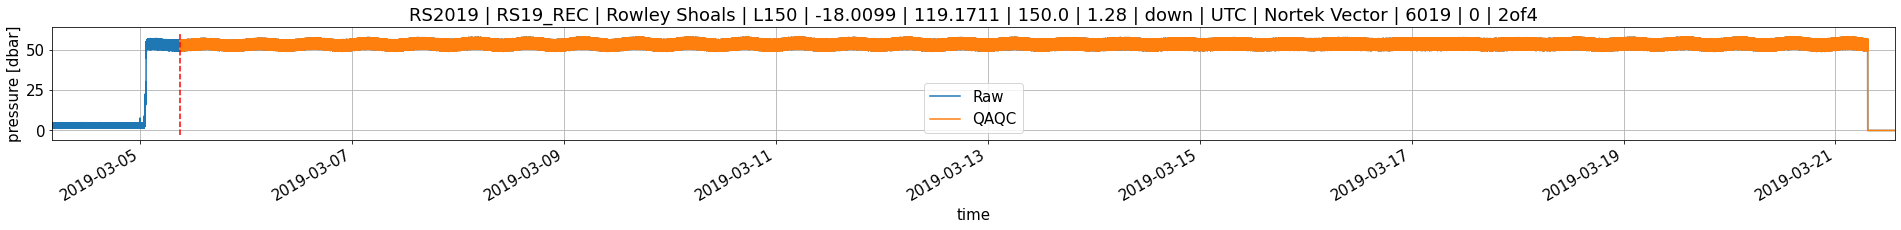

Reading whole file
Reading vec with dallsporpoise
2 of 1178599425 (1.7e-07%)
Reading file. 2 of 1178599425 (1.7e-07%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
Having to search for synch (current position 786)
Having to search for synch (current position 787)
Having to search for synch (current position 788)
Having to search for synch (current position 789)
Having to search for synch (current position 790)
Having to search for synch (current position 791)
Having to search for synch (current position 792)
VEL NOT IN DAT, INITIALISING
c has reset (happens when reading in chunks).
MPLTIME NOT IN DAT, INITIALISING
11786005 of 1178599425 (1.0%)
Reading file. 11786005 of 1178599425 (1.0%)
      Time at 473778 has been interpreted as No

365365829 of 1178599425 (31.0%)
Reading file. 365365829 of 1178599425 (31.0%)
      Time at 14688042 has been interpreted as None[nan]
      Time at 14688023 [last sys this chunk] has been interpreted as 2019-03-26 14:47:34.000003[737144.6163657408]
377151817 of 1178599425 (32.0%)
Reading file. 377151817 of 1178599425 (32.0%)
      Time at 15161850 has been interpreted as None[nan]
      Time at 15161847 [last sys this chunk] has been interpreted as 2019-03-26 18:54:21.000005[737144.7877430556]
388937825 of 1178599425 (33.0%)
Reading file. 388937825 of 1178599425 (33.0%)
      Time at 15635660 has been interpreted as None[nan]
      Time at 15635639 [last sys this chunk] has been interpreted as 2019-03-26 23:01:07.000002[737144.9591087963]
400723813 of 1178599425 (34.0%)
Reading file. 400723813 of 1178599425 (34.0%)
      Time at 16109468 has been interpreted as None[nan]
      Time at 16109463 [last sys this chunk] has been interpreted as 2019-03-27 03:07:54.000004[737145.1304861112]


754303633 of 1178599425 (64.0%)
Reading file. 754303633 of 1178599425 (64.0%)
      Time at 30323733 has been interpreted as None[nan]
      Time at 30323703 [last sys this chunk] has been interpreted as 2019-04-01 06:31:09.000001[737150.2716319445]
766089645 of 1178599425 (65.0%)
Reading file. 766089645 of 1178599425 (65.0%)
      Time at 30797542 has been interpreted as None[nan]
      Time at 30797527 [last sys this chunk] has been interpreted as 2019-04-01 10:37:56.000003[737150.4430092593]
777875629 of 1178599425 (66.0%)
Reading file. 777875629 of 1178599425 (66.0%)
      Time at 31271351 has been interpreted as None[nan]
      Time at 31271319 [last sys this chunk] has been interpreted as 2019-04-01 14:44:42[737150.614375]
789661617 of 1178599425 (67.0%)
Reading file. 789661617 of 1178599425 (67.0%)
      Time at 31745159 has been interpreted as None[nan]
      Time at 31745143 [last sys this chunk] has been interpreted as 2019-04-01 18:51:29.000002[737150.7857523148]
801447629 o

1143241465 of 1178599425 (97.0%)
Reading file. 1143241465 of 1178599425 (97.0%)
      Time at 45959424 has been interpreted as None[nan]
      Time at 45959415 [last sys this chunk] has been interpreted as 2019-04-06 22:14:45.000004[737155.9269097223]
1155027449 of 1178599425 (98.0%)
Reading file. 1155027449 of 1178599425 (98.0%)
      Time at 46433233 has been interpreted as None[nan]
      Time at 46433207 [last sys this chunk] has been interpreted as 2019-04-07 02:21:31.000002[737156.098275463]
1166813437 of 1178599425 (99.0%)
Reading file. 1166813437 of 1178599425 (99.0%)
      Time at 46907041 has been interpreted as None[nan]
      Time at 46907031 [last sys this chunk] has been interpreted as 2019-04-07 06:28:18.000003[737156.2696527778]
EOFError: Reached the end of the file successfully.
Converting to scientific units.
There are 1480651 non nan times.
There are no bursts so were going to cheat.
nburst is 47659904
Interpolating SEN variables
     Prior to interpolation there wer

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[128]_[Nortek Vector]_[6019]_[3of4].nc
Figure size is 69.0 x 8.0 cm
Blanking 0 values.


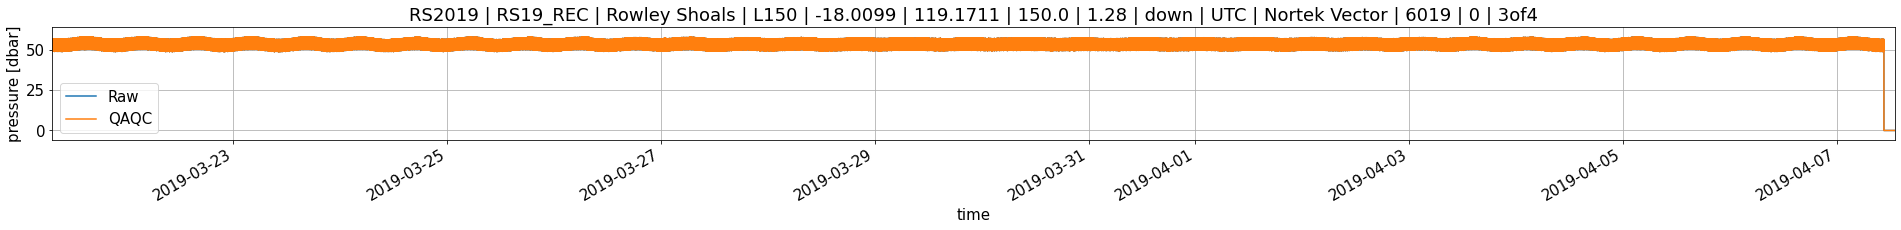

Reading whole file
Reading vec with dallsporpoise
2 of 1178599425 (1.7e-07%)
Reading file. 2 of 1178599425 (1.7e-07%)
("'VectorReader' object has no attribute 'data'",)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 32000
Continuous mode - happy days. 
Scanning ADV
Having to search for synch (current position 786)
Having to search for synch (current position 787)
Having to search for synch (current position 788)
Having to search for synch (current position 789)
Having to search for synch (current position 790)
Having to search for synch (current position 791)
Having to search for synch (current position 792)
Having to search for synch (current position 793)
Having to search for synch (current position 794)
Having to search for synch (current position 795)
Having to search for synch (current position 796)
Having to search for synch (c

341793848 of 1178599425 (29.0%)
Reading file. 341793848 of 1178599425 (29.0%)
      Time at 13740423 has been interpreted as None[nan]
      Time at 13740420 [last sys this chunk] has been interpreted as 2019-04-12 09:51:33.000001[737161.4107986111]
353579832 of 1178599425 (30.0%)
Reading file. 353579832 of 1178599425 (30.0%)
      Time at 14214232 has been interpreted as None[nan]
      Time at 14214212 [last sys this chunk] has been interpreted as 2019-04-12 13:58:18.999998[737161.5821643518]
365365844 of 1178599425 (31.0%)
Reading file. 365365844 of 1178599425 (31.0%)
      Time at 14688041 has been interpreted as None[nan]
      Time at 14688036 [last sys this chunk] has been interpreted as 2019-04-12 18:05:06[737161.7535416667]
377151828 of 1178599425 (32.0%)
Reading file. 377151828 of 1178599425 (32.0%)
      Time at 15161850 has been interpreted as None[nan]
      Time at 15161828 [last sys this chunk] has been interpreted as 2019-04-12 22:11:51.999997[737161.9249074074]
3889378

730731652 of 1178599425 (62.0%)
Reading file. 730731652 of 1178599425 (62.0%)
      Time at 29376114 has been interpreted as None[nan]
      Time at 29376100 [last sys this chunk] has been interpreted as 2019-04-18 01:35:07.999999[737167.0660648148]
742517660 of 1178599425 (63.0%)
Reading file. 742517660 of 1178599425 (63.0%)
      Time at 29849924 has been interpreted as None[nan]
      Time at 29849892 [last sys this chunk] has been interpreted as 2019-04-18 05:41:53.999996[737167.2374305555]
754303648 of 1178599425 (64.0%)
Reading file. 754303648 of 1178599425 (64.0%)
      Time at 30323732 has been interpreted as None[nan]
      Time at 30323716 [last sys this chunk] has been interpreted as 2019-04-18 09:48:40.999998[737167.4088078703]
766089636 of 1178599425 (65.0%)
Reading file. 766089636 of 1178599425 (65.0%)
      Time at 30797540 has been interpreted as 2019-04-18 13:55:28[737167.5801851852]
      Time at 30797540 [last sys this chunk] has been interpreted as 2019-04-18 13:55:

1119669456 of 1178599425 (95.0%)
Reading file. 1119669456 of 1178599425 (95.0%)
      Time at 45011805 has been interpreted as None[nan]
      Time at 45011780 [last sys this chunk] has been interpreted as 2019-04-23 17:18:42.999997[737172.7213310185]
1131455468 of 1178599425 (96.0%)
Reading file. 1131455468 of 1178599425 (96.0%)
      Time at 45485614 has been interpreted as None[nan]
      Time at 45485604 [last sys this chunk] has been interpreted as 2019-04-23 21:25:29.999999[737172.8927083333]
1143241452 of 1178599425 (97.0%)
Reading file. 1143241452 of 1178599425 (97.0%)
      Time at 45959423 has been interpreted as None[nan]
      Time at 45959396 [last sys this chunk] has been interpreted as 2019-04-24 01:32:15.999997[737173.064074074]
1155027440 of 1178599425 (98.0%)
Reading file. 1155027440 of 1178599425 (98.0%)
      Time at 46433231 has been interpreted as None[nan]
      Time at 46433220 [last sys this chunk] has been interpreted as 2019-04-24 05:39:02.999998[737173.23545

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1072: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\rs19\archive_FV01\Nortek Vector
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\rs19\archive_FV01\Nortek Vector//[RS2019]_[RS19_REC]_[L150]_[128]_[Nortek Vector]_[6019]_[4of4].nc
Figure size is 69.0 x 8.0 cm
Blanking 0 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


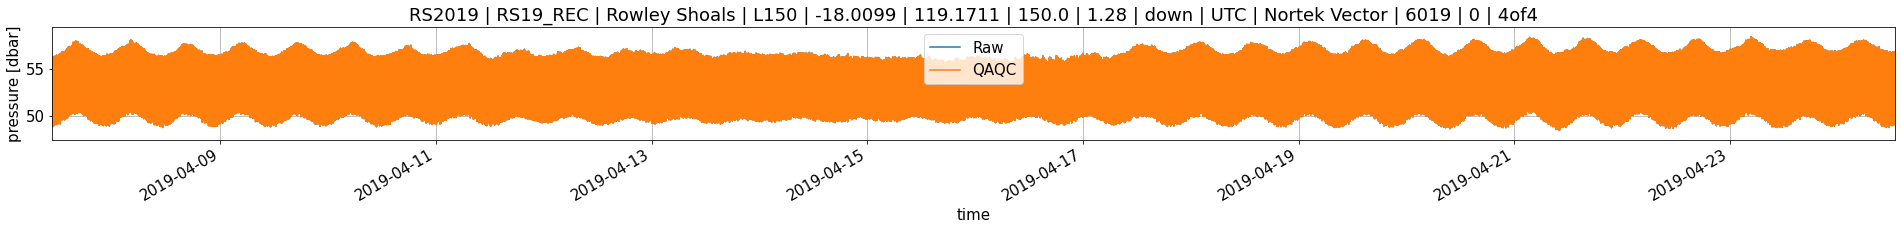

<timed exec>:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


Wall time: 4h 18min 48s


In [15]:
%%time

nens = 1000
nens = None

# rr = NORTEK_VECTOR(os.path.split(fullpath)[0], os.path.split(fullpath)[1], nens=10000, driver='dallsporpoise')

filetypes = ['Nortek Vector'];

db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
moorings = db_data['possible_mooring_dates']['Mooring'].values

for index, row in db_data['autonomous_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    attributes = ai.row_to_attrs(row)
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue
        
#     if row['FileName'] == '60170*.VEC':
        
#         continue

    if instrument in filetypes:

        filename_wc = os.path.join(moored_data_root, row['FilePath'], row['FileName'])
        
        filenames = glob.glob(filename_wc)
        if len(filenames) == 0:
            print('Skipping ' + row['FileName'])
            continue
                                    
        for filenum, filename in enumerate(filenames):
            
            
            rr, ds = nortek_vector.from_vec(filename, driver='dallsporpoise', nens=nens, debug=False)
                
            attributes['outfile_append'] = ('{}of{}'.format(filenum+1, len(filenames)))
            rr.update_attributes_with_dict(attributes)

            rr.ds = rr.ds.assign_coords({'time': rr.ds.datetime.values})
            pqc.pimosInOutWaterQC(rr, mooring, db_data, experiment='rs2019', recovered='rs19_rec')
            pqc.pimosCorrMagVelocitySetQC(rr, 85)
            pqc.pimosFishDetectionQC(rr, 40)
                        
            ai.pIMOS_export(rr, archive_dir, instrument, str(sn)+'_'+os.path.split(filename)[1])

            fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='pressure', plotraw=True)
            png_path = rr.fullpath_last_export[0:-3] +'pressure.png'
            fig.savefig(png_path, dpi=300)

            

# Now the Signature
This will need to be done in chunks


In [ ]:
# # Apr-3 wave
# start = 50*30000+700000
# end   = 55*30000+750000

# nens=[start, end]
step = 400000
    
# signature = (fullpath, dat=None, nens=nens, hasb=hasb)
filetypes = ['Signature 1000'];

db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
moorings = db_data['possible_mooring_dates']['Mooring'].values

dfd = r'G:\Experiments\kissme17\Data\FLNTU\Device Files'

for index, row in db_data['autonomous_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    attributes = ai.row_to_attrs(row)
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue
        
#     if row['FileName'] == '60170*.VEC':
#         continue

    if instrument in filetypes:

        filename_wc = os.path.join(moored_data_root, row['FilePath'], row['FileName'])
        
        filenames = glob.glob(filename_wc)
        if len(filenames) == 0:
            print('Skipping ' + row['FileName'])
            continue
                        
        for filenum, filename in enumerate(filenames):
            
#             if not filenum == 29:
#                 continue
            
            st = 31
#             st = 8
            if False:
                for ii in np.arange(st, 1000): # Not very well thought out at the moment
                    nens = [(ii)*step, (ii+1)*step]

                    rr, ds = nortek_signature.from_ad2cp(filename, nens=nens)

                    rr.update_attributes_with_dict(attributes)

        #             rr.ds = rr.ds.assign_coords({'time': rr.ds.datetime.values})
                    rr.ds['echo'] = rr.ds['echo'].astype(float)
                    pqc.pimosInOutWaterQC(rr, mooring, db_data, experiment='rs2019', recovered='rs19_rec')
                    pqc.pimosTiltVelocitySimpleQC(rr, 10)
                    pqc.pimosEchoIntensitySimpleQC(rr, 29)
                    pqc.pimosCorrMagVelocitySetQC(rr, corr_name='corr', thresh_1= 85)

                    fn = str(sn)+'_['+str(nens[0])+'-'+str(nens[1])+']'
                    ai.pIMOS_export(rr, archive_dir, instrument, fn)

                    fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='pressure',plotraw=True)
                    png_path = rr.fullpath_last_export[0:-3] +'.png'
                    fig.savefig(png_path, dpi=300)
            else:
                print(filename)
                rr, ds = nortek_signature.from_ad2cp(filename)
                
                # This will give each output file a unique name
                attributes['outfile_append'] = ('{}of{}'.format(filenum+1, len(filenames)))
                
                rr.update_attributes_with_dict(attributes)
                
                pqc.pimosInOutWaterQC(rr, mooring.lower(), db_data, experiment='rs2019', recovered='rs19_rec')
                pqc.pimosTiltVelocitySimpleQC(rr, 10)
                pqc.pimosEchoIntensitySimpleQC(rr, 29)
                pqc.pimosCorrMagVelocitySetQC(rr, corr_name='corr', thresh_1= 0)
                
                fn = str(sn)
                fn
                
                rr._calc_rotations()
                
                ai.pIMOS_export(rr, archive_dir, instrument, fn)
                
                fig = ai.plot_echo(rr, db_data, mooring, attributes, variable='vel_enu', cmap='RdBu')
                png_path = rr.fullpath_last_export[0:-3] +'ENU_1.png'
                fig.savefig(png_path, dpi=300)

                fig = ai.plot_echo(rr, db_data, mooring, attributes, cmap='inferno')
                png_path = rr.fullpath_last_export[0:-3] +'ECHO_1.png'
                fig.savefig(png_path, dpi=300)
                

# Signature 1000 phase wrapping notes from WEL

I started Signature QC for turbulence on the WEL Solitons project, but we never got this to Research Quality. There appears to be some phase wrapping etc. That said, the averaged velocities look good. So I'm happy to leave this here for now. See below....


### To start, plot the beam velocities

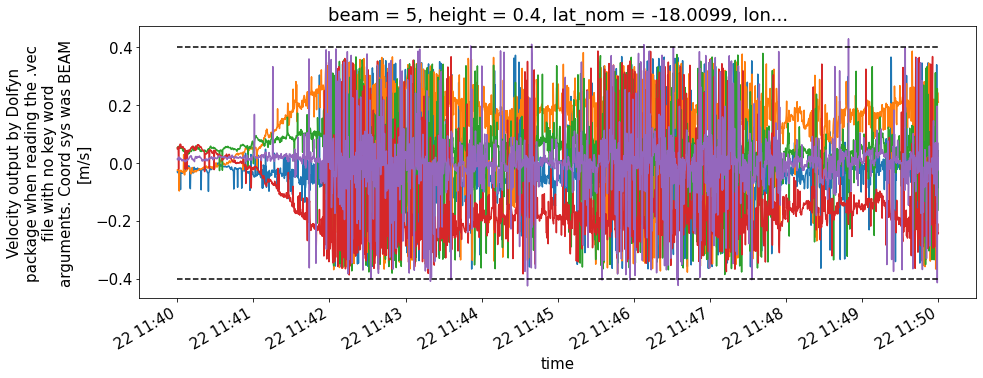

In [80]:
av = 0.4 # This is a guess
    
da = rr.ds['vel_dolfyn']
da = da.sel(time=slice(datetime.datetime(2019, 3, 22, 11, 40), datetime.datetime(2019, 3, 22, 11, 50)))

plt.figure(figsize=(15, 5))
da[0, 10, :].plot(label='Beam 1')
da[1, 10, :].plot(label='Beam 2')
da[2, 10, :].plot(label='Beam 3')
da[3, 10, :].plot(label='Beam 4')
da[4, 10, :].plot(label='Beam 5')
plt.legend()

plt.plot(da.time[[0, -1]], [av, av], 'k--')
plt.plot(da.time[[0, -1]], [-av, -av], 'k--')

### Now view that in profile mode

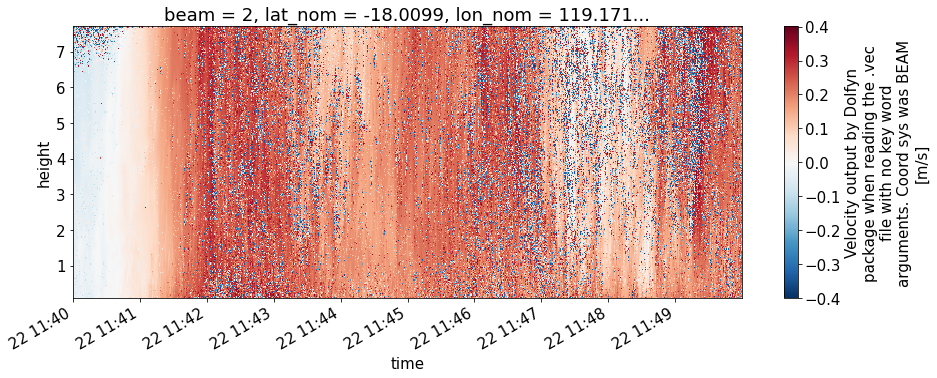

In [69]:
da = da[1, :, :]
plt.figure(figsize=(15, 5))
da[:, :].plot()

### Now look at the mean velocities

In [70]:
avg_cells = 10
dt = float(ds.time[1]-ds.time[0])/1e9
fs = int(1/dt)
avg_secs = 20

op = da.rolling(height=avg_cells, center=True, min_periods=int(avg_cells/2)).median()
op = op.rolling(time=fs*avg_secs, center=True, min_periods=int(8*avg_secs/2)).median()

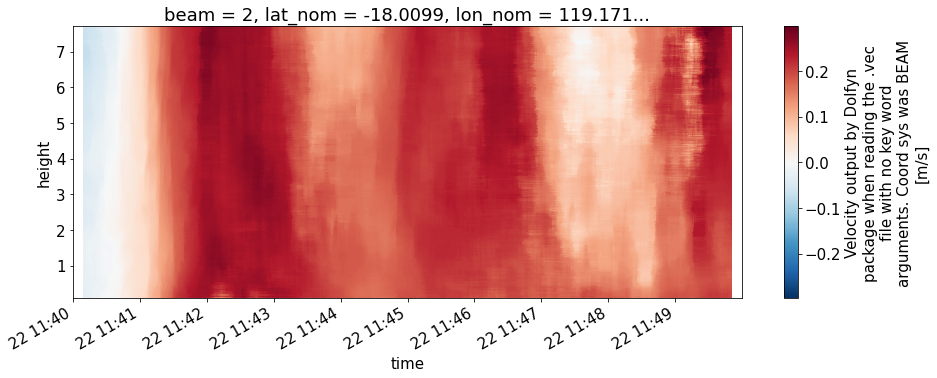

In [71]:
plt.figure(figsize=(15, 5))
op[:, :].plot()

### Thoughts
We should revisit this. For now I'll let it go. Just need to think about how we flag these sorts of things. I think unwrapping and despiking should really be the next process level - Level 2